# Исследование объявлений о продаже квартир


# Описание проекта
В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# План по выполнению проекта

1. Откроем файл с данными и изучить общую информацию:
    1. Загрузим данные из файла в датафрейм;
    0. Изучим общую информацию о полученном датафрейме;
    0. Построим общую гистограмму для всех числовых столбцов таблицы.
2. Проведем предобработку данных:
    1. Найдем и изучим пропущенные значения в столбцах;
    0. Заполним пропущенные значения там, где это возможно;
    0. Укажем причины, которые могли привести к пропускам в данных;
    0. Рассмотрим типы данных в каждом столбце;
    0. Преобразуем тип данных в столбцах, в которых нужно изменить тип данных;
    0. Объясним, почему нужно изменить тип данных;
    0. Изучим уникальные значения в столбцах с названиями и устраним неявные дубликаты;
    0. Найдем и устраним редкие и выбивающиеся значения;
    0. Опишем, какие особенности в данных мы обнаружили.
3. Добавим в таблицу новые столбцы со следующими параметрами:
    - цена одного квадратного метра;
    - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
    - месяц публикации объявления;
    - год публикации объявления;
    - тип этажа квартиры (значения — «первый», «последний», «другой»);
    - расстояние до центра города в километрах.
4. Проведем исследовательский анализ данных:
    1. Изучим следующие параметры объектов:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления.
    2. Построим отдельные гистограммы для каждого из этих параметров. 
    0. Опишем наблюдения по параметрам.
5. Изучим, как быстро продавались квартиры (столбец `days_exposition`):
    - Построим гистограмму;
    - Посчитаем среднее и медиану;
    - Опишем, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими? Какие факторы больше всего влияют на общую (полную) стоимость объекта?
6. Изучим, зависит ли цена от:
    - общей площади;
    - жилой площади;
    - площади кухни;
    - количества комнат;
    - этажа, на котором расположена квартира (первый, последний, другой);
    - даты размещения (день недели, месяц, год).
    - Построим графики, которые покажут зависимость цены от указанных выше параметров.
7. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.
8. Выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города.
9. Напишем общий вывод.

# Описание данных
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

# Импорт библиотек

In [1]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Откроем файл с данными и изучить общую информацию:

Считаем данные из csv-файла в датафрейм и сохраним в переменную `data`:

In [2]:
data_1 = 'real_estate_data.csv'
data_2 = 'https://code.s3.yandex.net/datasets/real_estate_data.csv'

if os.path.exists(data_1):
    data = pd.read_csv(data_1, sep='\t')
elif os.path.exists(data_2):
    data = pd.read_csv(data_2, sep='\t')
else:
    print('Something is wrong')

### Изучим общую информацию о полученном датафрейме:

Выведем первые 10 строчек датафрейма `data` на экран:

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выведем основную информацию о датафрейме с помощью метода `info()`:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим общую гистограмму для всех числовых столбцов таблицы методом `hist`:

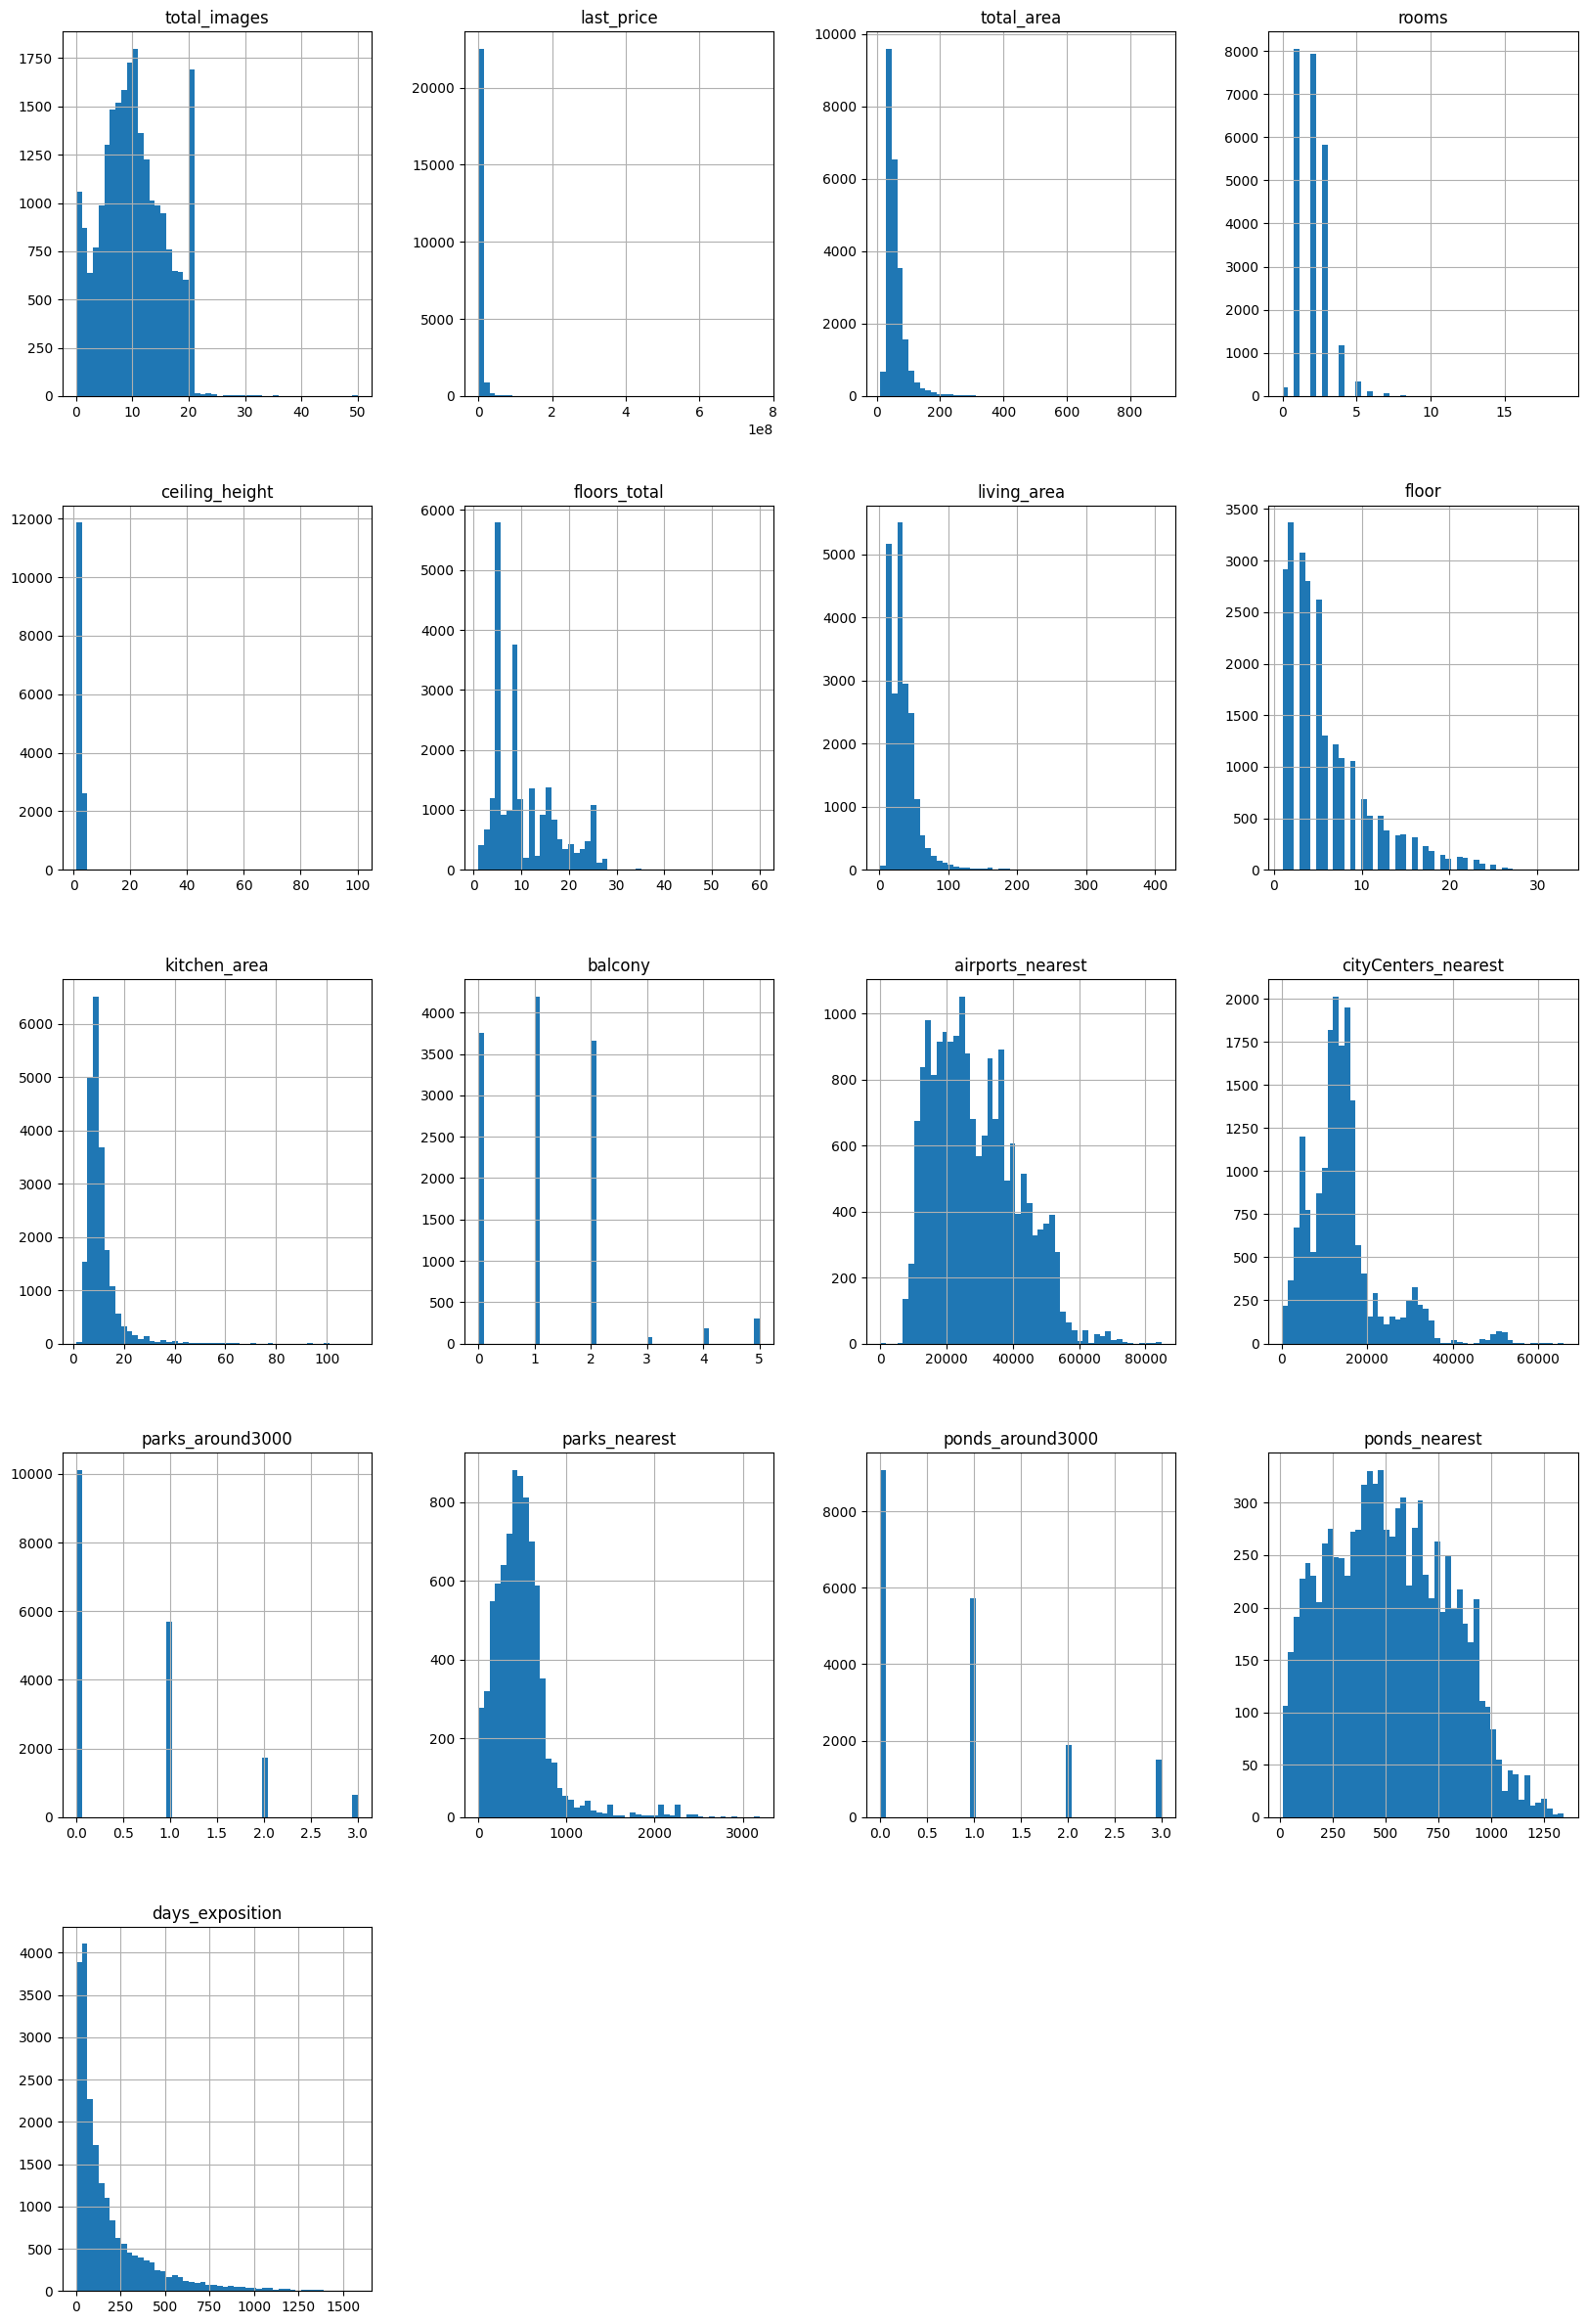

In [5]:
data.hist(figsize=(20, 30), bins=50);

Применим метод `describe` чтобы зафиксировать заметные на гистограмме нюансы распределения в числах:

In [6]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


## Выводы после изучения данных:

По предварительному просмотру основной информации данных можно отметить следующее:
- данные имеют достаточно большое колличество пропусков в столбцах: `is_apartment`, `balcony`, `parks_nearest` и `ponds_nearest`;
- колонка `first_day_exposition` содержащая в себе данные (дату публикации обьявления) типа `object` нужно заменить на данные типа  `datetime` для более удобной работы с датами;
- колонки:
    - `floors_total`
    - `balcony`
    - `parks_around3000`
    - `ponds_around3000`  
    - `days_exposition`
  содержат данные типа `float`. С ними также можно провести работу по замене типа данных на `int`(странно, если в радиусе 3 км от вашего дома будет 2,65 парка);
- колонка `is_apartment` (апартаменты (булев тип)) аналогично содержит данные некорректного типа `object`. Возможно, из этого и следует количество пропусков в данной колонке;
- по представленным гистаграммам и сводной таблицы метода `describe` можно заметить следующее:
    - `last_price` минимальная цена квартиры `12190` руб., похожа на ошибку. Максимальная цена `763 000 000` руб. очень большая, но  возможна. Такие значения могут плохо влиять на среднее значение.
    - `rooms` минимальное число комнат `0` - ошибка. Как вариант это может быть квартира-студия.
    - `ceiling_height` минимальная высота потолков `1` метр, максимальная - `100` метров. Явная ошибка.
    - `floors_total` max количество этажей `60` похоже на ошибку, самое высокое здание в Санкт-Петербурге и окретностях имеет `35` этажей.
    - `living_area` min жилая площадь `2` м² невозможна, ошибка.
    - `kitchen_area` min площадь кухни `1,3` м² невозможна, ошибка.
    - `airports_nearest` min расстояние до аэропорта `0` м невозможно.
    - `days_exposition` минимальное количество дней размещения объявления - `1`. Продажа недвижимости за `1` день или снятие объявления по другой причине - допустимый вариант, но, если таких объявлений много, то такие данные могут негативно влиять на среднее. Максимальное значение - `1580` дней (больше 4-х лет) также может негативно влиять на среднее время.


## 2. Проведем предобработку данных:

Приведем имена столбцов к единому стилю:

In [7]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                            'parks_around3000': 'parks_around_3000', 
                            'ponds_around3000': 'ponds_around_3000'}) # переименовываем название колонок методом `rename`

Найдем колличество пропущенных значений в столбцах датафрейма:

In [8]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В 14 столбцах из 22 присутствуют пропуски:

`ceiling_height`: 9195 пропусков. Почти 40% объявлений не имеют информацию о высоте потолков, это очень большое количество. Данные по этому столбцу для нашего исследования не так важны. Но, следует принять, что для более чем трети объектов он не указан. Пропуски оставляем.

`floors_total`: 86 пропусков. Пропусков мало, заполним пропуски по высоте потолков медианным значением относительно населенных пунктов.

`living_area`: 1903 пропуска. Вероятно, пользователи не помнят точную площадь, поэтому не пишут ее. Количество пропусков менее 10%, но данные по этому столбцу нужны нам для исследования. Однако, заполнить значения нечем, оставим пропуски.

`is_apartment`: 20924 пропусков. Вероятно, пользователи часто не указывают тип недвижимости, если он просто жилой. Т.к. в этом столбце булев тип данных, пропуски можно заменить на False.

`kitchen_area`: 2278 пропусков. Вероятно, пользователи не помнят точную площадь, поэтому не пишут ее. Количество пропусков менее 10%, но нам важны эти данные для исследования. Заполнить значения нечем, оставим пропуски.

`balcony`: 11519 пропусков. Вероятно, пользователи при отсутствии балконов их не указывают. В таком случае заменим пропуски нулями.

`locality_name`: 49 пропусков. Без идентификации населенного пунка исследование не интересно, поэтому пропущенные значения удалим (49 строк данных никак не повлияют на результат исследования (0,2% данных)).


`airports_nearest`: 5542 пропусков. Вероятно, пропуски возникли в связи с отсутствием информации на картографических данных. Поэтому пропуски оставим.

`city_centers_nearest`: 5519 пропусков. Вероятно, пропуски возникли в связи с отсутствием информации на картографических данных. Эти данные важны для исследования. Пропуски в столбце на задачи исследования не влияют, оставим их.

`parks_around_3000`: 5518 пропусков. Число пропусков совпадает с числом пропусков в ponds_around_3000, что подозрительно. Возможно, для этих объектов не была получена информация на основе картографических данных. Пропуски в столбце на задачи исследования не влияют, оставим их.

`parks_nearest`: 15620 пропусков. Более половины объектов не имеют информации о ближайшем парке. Скорее всего, информация на основе картографических данных не была получена. Пропуски в столбце на задачи исследования не влияют, оставим их.

`onds_around_3000`: 5518 пропусков. Число совпадает с числом пропусков parks_around_3000, что выглядит подозрительно. Скорее всего, для этих объектов не была получена информация на основе картографических данных. Пропуски в столбце на исследование не влияют, оставим их.

`ponds_nearest`: 14589 пропусков. Больше половины объектов не имеют информации о ближайшем парке. Скорее всего, информация на основе картографических данных не была получена. Пропуски в столбце на задачи исследования не влияют, оставим их.

`days_exposition`: 3181 пропусков. 13% объявлений не содержат информации о количестве дней размещения объявления, подозрительно, т.к. эти данные должны быть получены автоматически. Возможно, это техническая ошибка, которая произошла в момент сбора/выгрузки данных. Данные этого столбца важны для исследования. Заполнить значения нечем, оставим пропуски.

In [9]:
def pass_value_barh(df):
    try:
        (df.isna().mean()*100).to_frame().rename(columns = {0:'space'}) \
        .query('space > 0').sort_values(by = 'space', ascending = True) \
        .plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
       
        plt.title('Пропущенные значения, %' + "\n", fontsize=22)
        plt.xlabel("\n" + 'Процент пропусков', fontsize=15)
        plt.ylabel('Столбцы с пропусками'+ "\n", fontsize=15) 
        plt.xlim(0, 100)
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

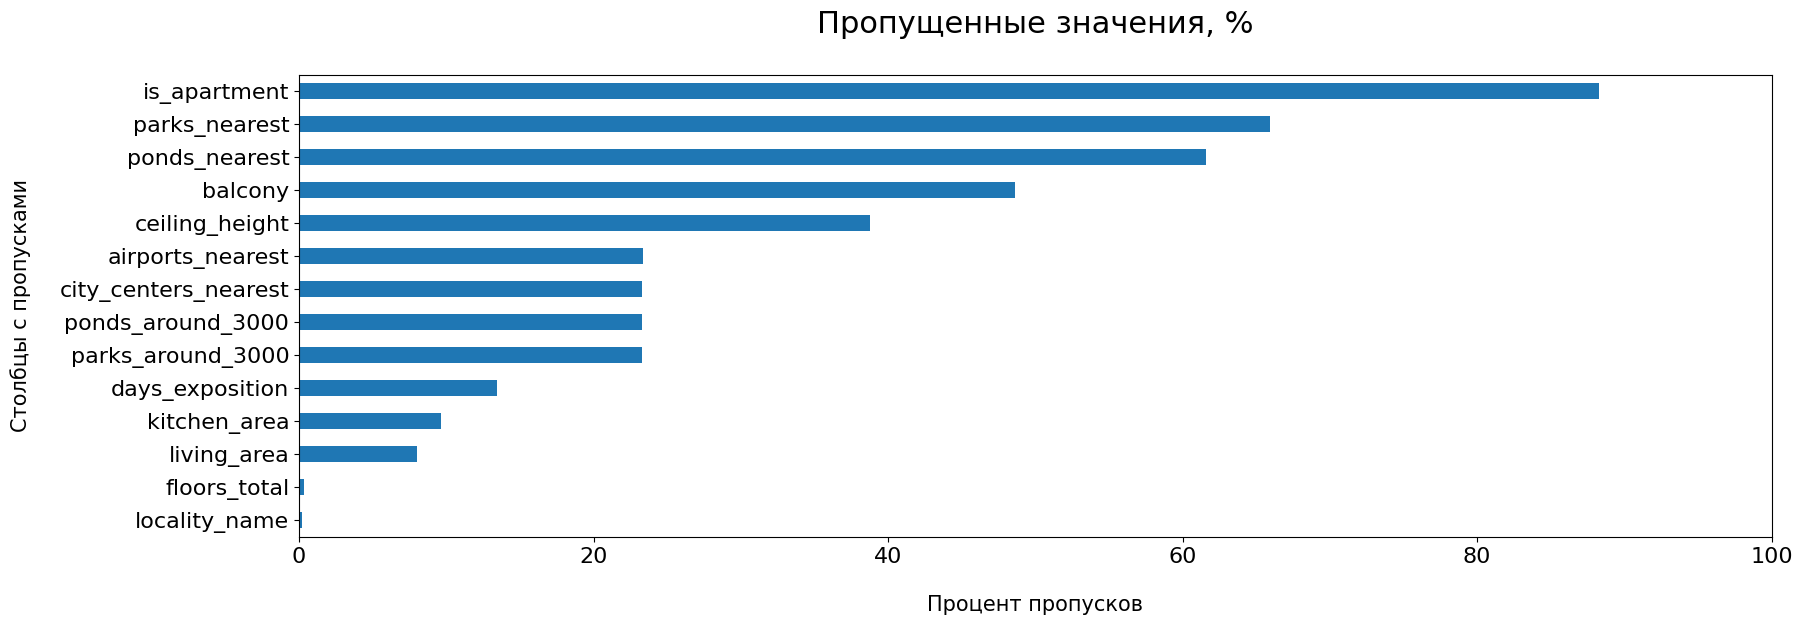

In [10]:
pass_value_barh(data)

Обработаем пропуски в столбце `is_apartment` (меняем на False):

In [11]:
data['is_apartment'].fillna(False, inplace=True) # Устраним пропуски методом 'dropna'

Обработаем пропуски в столбце `balcony` (меняем на 0).

In [12]:
data['balcony'].fillna(0, inplace=True) # Устраним пропуски методом 'dropna'

Обработаем пропуски в столбце `locality_name` (Удалим строки без города, они будут мешать в анализе данных)

In [13]:
data = data.dropna(subset=['locality_name']) # Удалим строки методом 'dropna'

In [14]:
data = data.dropna(subset=['floors_total']) # Удалим строки методом 'dropna'

## Преобразуем типы данных:

В выводе первого пункта мы выделили столбцы, в которых нужно преобразовать один тип данных в другой. В ходе обработки пропусков получили, что некоторые пропуски убрать не удалось, следовательно преобразовать в другой тип `int` также не получится. Для этих случаев оставим тип `float`.

Меняем тип данных  в следующих столбцах `last_price` (`int`), `first_day_exposition`(`datetime`), `is_apartment`(`boolean`), `balcony`(`int`).

In [15]:
data[['last_price', 'balcony', 'floors_total']] = data[['last_price', 'balcony', 'floors_total']].apply(lambda x: x.astype('int64'))
# преобразуем столбцы 'last_price', 'balcony' к типу данных int

In [16]:
data['is_apartment'] = data['is_apartment'].astype('boolean') # преобразуем столбец 'is_apartment' к булевому типу данных

In [17]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# преобразуем 'first_day_exposition' к типу datetime с помощью pd.to_datetime

Проверим тип данных в обработанных столбцах:

In [18]:
checklist_1 = ['last_price', 'balcony', 'is_apartment', 'first_day_exposition']
for name_column in checklist_1:
    print(f'В колонке {name_column} тип данных {data[name_column].dtypes}')

В колонке last_price тип данных int64
В колонке balcony тип данных int64
В колонке is_apartment тип данных boolean
В колонке first_day_exposition тип данных datetime64[ns]


## Обработаем явные и неявные дубликаты:

### Явные дубликаты:

In [19]:
data.duplicated().sum() # проверим строки на явные дубликаты методом 'duplicated' и выведем их сумму методом 'sum'

0

Явных дубликатов нет

### Неявные дубликаты:

In [20]:
data['locality_name'].sort_values().unique() 
# выведем отсортированные уникальные значения 'locality_name' использую методы 'sort_values' и 'unique'

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Можно заметить две проблемы в данных:
- 'поселок' и 'посёлок' дублируют значения;
- Eсть повторы в названиях населенных пунктов, а именно:
    - 'Никольское': 'село Никольское';
    - 'городской посёлок Советский': 'посёлок городского типа Советский';
    - 'городской посёлок Большая Ижора': 'посёлок городского типа Большая Ижора';
    - 'городской посёлок Лесогорский': 'посёлок городского типа Лесогорский';
    - 'посёлок Рябово': 'посёлок городского типа Рябово';
    - 'городской посёлок Мга': 'посёлок городского типа Мга';
    - 'городской посёлок Павлово': 'посёлок городского типа Павлово';
    - 'городской посёлок Назия': 'посёлок городского типа Назия';
    - 'коттеджный посёлок Лесное': 'посёлок Лесное';
    - 'Мурино': 'посёлок Мурино';
    - 'Любань': 'посёлок Любань';
    - 'городской посёлок Рощино': 'посёлок городского типа Рощино';
    - 'деревня Кудрово': 'Кудрово'.


In [21]:
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')
# заменяем поселок на посёлок методом 'replace'

In [22]:
data = data.replace({'locality_name':{'Никольское': 'село Никольское', \
'городской посёлок Советский': 'посёлок городского типа Советский', \
'городской посёлок Большая Ижора': 'посёлок городского типа Большая Ижора', \
'городской посёлок Лесогорский': 'посёлок городского типа Лесогорский', \
'посёлок Рябово': 'посёлок городского типа Рябово', 'городской посёлок Мга': 'посёлок городского типа Мга', \
'городской посёлок Павлово': 'посёлок городского типа Павлово', 'городской посёлок Назия': 'посёлок городского типа Назия', \
'коттеджный посёлок Лесное': 'посёлок Лесное', 'Мурино': 'посёлок Мурино', 'Любань': 'посёлок Любань', \
'городской посёлок Рощино': 'посёлок городского типа Рощино', 'деревня Кудрово': 'Кудрово', \
'городской посёлок Советский': 'посёлок городского типа Советский'}})
# повторы в названиях населенных пунктов приведем к одному значению методом 'replace'

In [23]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Новая Ладога', 'Отрадное', 'Павловск',
       'Петергоф', 'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск',
       'Пушкин', 'Санкт-Петербург', 'Светогорск', 'Сертолово',
       'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин',
       'Тосно', 'Шлиссельбург', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Новоселье',
       'городской посёлок Свирьстрой', 'городской посёлок Фёдоровское',
       'городской посёлок Янино-1', 'деревня Агалатово', 'деревня Аро',
       'деревня Батово', 'деревня Бегуницы', 'деревня Белогорка',
       'деревня Большая Вруда', 'деревня Большая Пустомержа',
       'деревня Большие Колпаны', 'деревня Большое Рейзино'

In [24]:
data['locality_name'] = data['locality_name'].str.replace('городской посёлок','поселок городского типа')

In [25]:
# check
data.locality_name.nunique()

317

In [26]:
data.duplicated().sum()

0

In [27]:
duplicateRows = data[data.duplicated(['total_area', 'floor', 'floors_total', \
                                      'city_centers_nearest', 'locality_name', 'rooms'], keep=False)]

In [28]:
duplicateRows

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
187,9,4300000,52.3,2017-10-06,2,NaN,12,29.80,4,False,...,10.90,0,Санкт-Петербург,32794.0,13643.0,0.0,NaN,0.0,NaN,69.0
197,5,1600000,46.0,2016-04-22,2,NaN,5,NaN,2,False,...,NaN,1,Сясьстрой,NaN,NaN,NaN,NaN,NaN,NaN,171.0
279,19,18450000,134.0,2019-03-18,4,NaN,18,78.00,17,False,...,30.00,0,Санкт-Петербург,34991.0,11920.0,0.0,NaN,0.0,NaN,NaN
355,17,3600000,55.2,2018-07-12,2,25.00,5,32.00,2,False,...,NaN,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
432,12,1490000,36.0,2018-09-10,1,2.50,5,17.10,3,False,...,8.40,2,Волосово,NaN,NaN,NaN,NaN,NaN,NaN,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23516,3,22529250,139.5,2018-07-04,4,3.30,16,82.55,9,False,...,13.84,0,Санкт-Петербург,37434.0,8460.0,1.0,441.0,2.0,427.0,266.0
23541,16,5200000,63.0,2017-10-27,3,2.55,12,41.00,4,False,...,7.00,0,Санкт-Петербург,49631.0,14525.0,2.0,672.0,1.0,172.0,165.0
23548,14,2250000,36.0,2017-10-14,1,2.50,5,17.00,5,False,...,9.00,0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,425.0
23643,1,660000,45.0,2019-02-19,2,NaN,5,31.00,4,False,...,6.00,1,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Обработаем редкие и выбивающиеся значения (аномалии):

Посмотрим значения параметров объектов недвижимости на разных квантилях:

In [29]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,20.00,2.30,3.00,"561,384.00",10.00,3.80,1.00,2.00
0.01,1.00,25.32,2.50,4.00,"1,000,000.00",13.00,5.00,1.00,2.00
0.5,2.00,52.00,2.65,95.00,"4,646,000.00",30.00,9.10,4.00,9.00
0.99,5.00,197.45,3.82,"1,067.14","36,000,000.00",120.00,35.03,23.00,26.00
0.9988,8.00,380.00,25.00,"1,370.64","124,856,064.00",219.92,60.00,26.00,35.00


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  boolean       
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

Запишем количество строк до изменения датафрейма в переменную `ROWS_DF`:

In [31]:
ROWS_DF = 23698

In [32]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10
# Для значений больше 20 применим деление на 10

In [33]:
data = data.query('ceiling_height >= 2.3 and ceiling_height <= 5 or ceiling_height.isnull()')

In [34]:
data = data.query('floors_total < 30 or floors_total.isnull()')

In [35]:
data = data.query('rooms < 7 or rooms.isnull()')

In [36]:
data = data.query('total_area >= 20 and total_area <= 197 or total_area.isnull()')

In [37]:
data = data.query('days_exposition >= 3 and days_exposition <= 1000 or days_exposition.isnull()')

In [38]:
data = data.query('last_price >= 550000 and last_price <= 36000000 or last_price.isnull()')

In [39]:
data = data.query('kitchen_area >= 4 and kitchen_area <= 35 or kitchen_area.isnull()')

In [40]:
data = data.query('living_area >= 10 and living_area <= 120 or kitchen_area.isnull()')

In [41]:
print(f'Потеряли {round(((ROWS_DF - len(data)) / ROWS_DF * 100), 2)} % данных')

Потеряли 6.32 % данных


## Выводы после предобработки данных:

В ходе работы по предообработке данных мы выполнили следующие шаги:
- Нашли и изучили пропущенные значения в столбцах;
- Определили, в каких столбцах есть пропуски;
- Заполнили пропущенные значения там, где это возможно;
- Указали причины, которые могли привести к пропускам в данных;
- Рассмотрели типы данных в каждом столбце и нашли столбцы, в которых нужно изменить тип данных. Преобразовали тип данных в выбранных столбцах;
- Изучили уникальные значения в столбце с названиями и устранили неявные дубликаты;
- Нашли и устранили редкие и выбивающиеся значения.
 


## 3. Добавим в таблицу новые столбцы со следующими параметрами

Произведем расчет требуемых данных, а именно:
- price_one_square_meter: цена одного квадратного метра;
- publication_weekday: день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- publication_month: месяц публикации объявления;
- publication_year: год публикации объявления;
- category_floor: тип этажа квартиры (значения — «первый», «последний», «другой»);
- city_centers_nearest_km: расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

и добавим их в таблицу для дальнейшего исследования.

In [42]:
data['price_one_square_meter'] = (data['last_price'] / data['total_area']).round(2)
# Добавим столбец с ценой за 1м² и округлим полученную цену до копеек

In [43]:
data['publication_weekday'] = data['first_day_exposition'].dt.weekday
# Добавим столбец с днем недели публикации объявления

In [44]:
data['publication_month'] = data['first_day_exposition'].dt.month
# Добавим столбец с месяцем публикации объявления

In [45]:
data['publication_year'] = data['first_day_exposition'].dt.year
# Добавим столбец с годом публикации объявления

Добавим столбец с категоризацией по этажам `category_floor` с использованием собственной функции `category_floor`:

In [46]:
def category_floor(row):
    
    try:
        floor = row['floor']
        floors_total = row['floors_total']
        if floor == 1:
            return 'первый'
        elif floor == floors_total:
            return 'последний'
        else:
            return 'другой'
    except:
        return 'нулевые или отрицательные значения в датафрейме'
        
# Функция для категоризации этажности в доме


In [47]:
data['category_floor'] = data.apply(category_floor, axis=1)
# Добавляем столбец с категорией этажа квартиры

In [48]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)
# Добавим столбец city_centers_nearest_km с расстоянием до центра города в километрах

Проверим все ли столбцы удалось добавить:

In [49]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,publication_weekday,publication_month,publication_year,category_floor,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
5,10,2890000,30.4,2018-09-10,1,NaN,12,14.4,5,False,...,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,NaN
6,6,3700000,37.3,2017-11-02,1,NaN,26,10.6,6,False,...,NaN,0.0,NaN,155.0,99195.71,3,11,2017,другой,19.0


## Выводы после добавления данных:

Добавили необходимые столбцы и произвели расчеты по ним, а именно:
- price_one_square_meter: цена одного квадратного метра;
- publication_weekday: день недели публикации объявления (`0` — понедельник, `1` — вторник и так далее);
- publication_month: месяц публикации объявления;
- publication_year: год публикации объявления;
- category_floor: тип этажа квартиры (значения — `«первый»`, `«последний»`, `«другой»`);
- city_centers_nearest_km: расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

Отметим, что пропусков в добавленных столбцах нету, но в столбце `floor_category` категория этажа могла определиться неверно, так как значения количества этажей для этих объектов отсутствуют.

## 4. Проведем исследовательский анализ данных:

Изучим параметры объектов недвижимости, а именно:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

и построим гистограммы для каждого из этих параметров.

#### Общая площадь


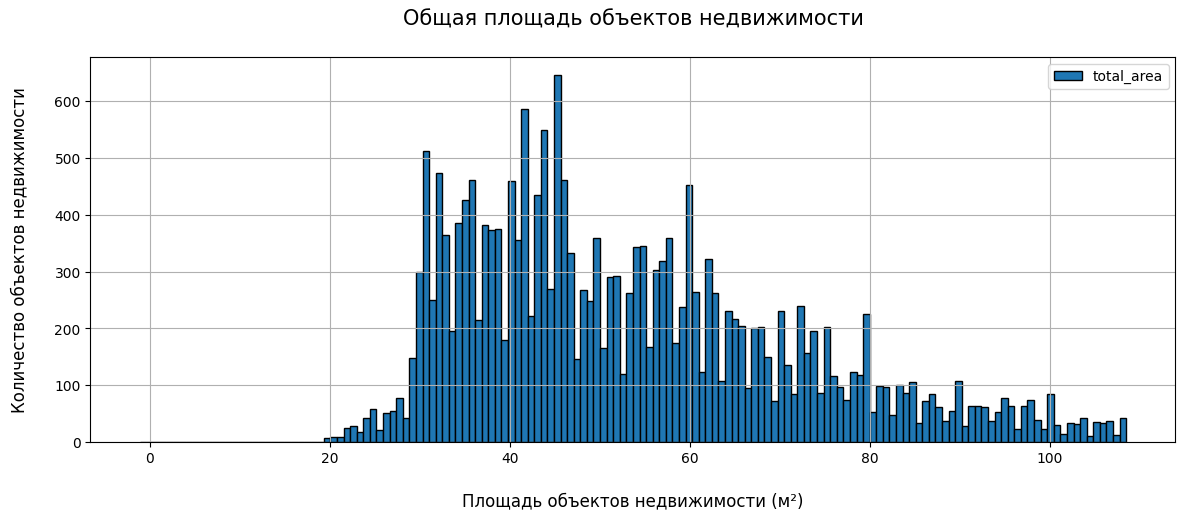

Минимальное значение - 20.0
Первый квартиль равен - 40.0
Медиана равна - 51.0
Среднее значение - 56.8
Третий квартиль равен - 67.4
Максимальное значение - 197.0


In [50]:
q1_tot_area = data['total_area'].quantile(.25) # первый квартиль Q1
q2_tot_area = data['total_area'].median() # медиана
avg_tot_area = data['total_area'].mean() # среднее значение 
q3_tot_area = data['total_area'].quantile(.75) # третий квартиль Q3
iqr_tot_area = q3_tot_area - q1_tot_area # межквартильный размах IQR
min_tot_area = data['total_area'].min() # минимальное значение 
max_tot_area = data['total_area'].max() # максмальное значение 
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов, также расчитаем для более наглядного вывода
# медиану, среднее значение, минимальное значение, максмальное значение

data['total_area'].hist(bins=150, range=((q1_tot_area - 1.5 * iqr_tot_area), (q3_tot_area + 1.5 * iqr_tot_area)), \
figsize=(14, 5), ec='black', legend=True)
plt.title('Общая площадь объектов недвижимости' + "\n", fontsize=15)
plt.xlabel("\n" + 'Площадь объектов недвижимости (м²)', fontsize=12)
plt.ylabel('Количество объектов недвижимости' + "\n", fontsize=12)
plt.show()
# Построим гистограмму 

print(f'''Минимальное значение - {min_tot_area}
Первый квартиль равен - {q1_tot_area}
Медиана равна - {q2_tot_area}
Среднее значение - {avg_tot_area.round(1)}
Третий квартиль равен - {q3_tot_area}
Максимальное значение - {max_tot_area}''')
# Выведем на экран необходимые для вывода параметры

Исключая выбросы, рассматриваемый диапазон примерно до 115 м². Большая часть объектов недвижимости имеет площадь от 30 м² до 65 м². Самый распространенный вариант - около 45 м². Площадь объектов более 100 м² и менее 30 м² - встречается редко. Среднее значение - 57 м² и медиана 51 м².

#### Жилая площадь

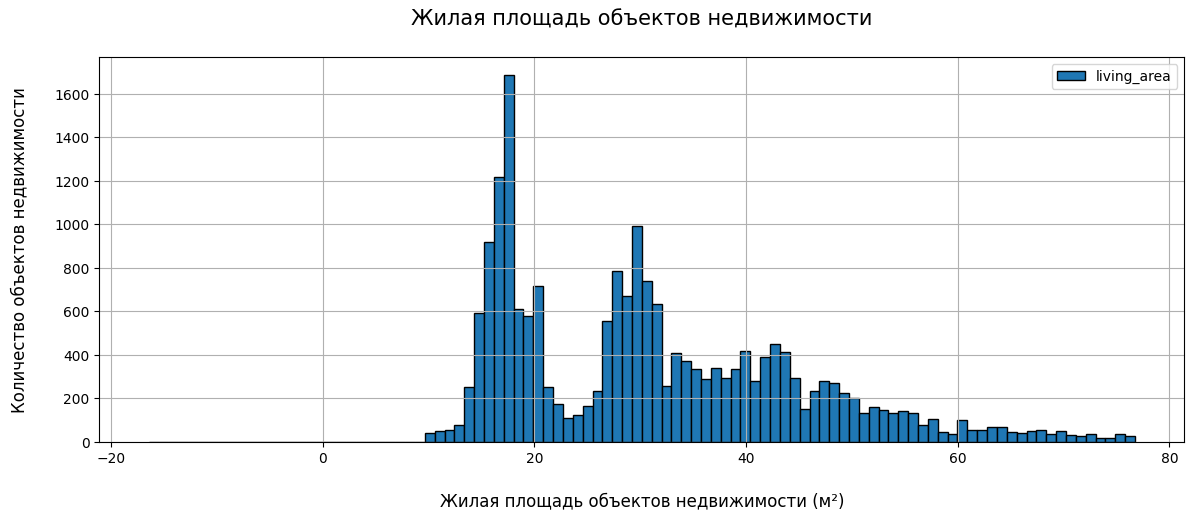

Минимальное значение - 2.0
Первый квартиль равен - 18.5
Медиана равна - 30.0
Среднее значение - 32.6
Третий квартиль равен - 41.8
Максимальное значение - 145.0


In [51]:
q1_liv_area = data['living_area'].quantile(.25) # первый квартиль Q1
q2_liv_area = data['living_area'].median() # медиана
avg_liv_area = data['living_area'].mean() # среднее значение 
q3_liv_area = data['living_area'].quantile(.75) # третий квартиль Q3
iqr_liv_area = q3_liv_area - q1_liv_area # межквартильный размах IQR
min_liv_area = data['living_area'].min() # минимальное значение 
max_liv_area = data['living_area'].max() # максмальное значение 
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов, также расчитаем для более наглядного вывода
# медиану, среднее значение, минимальное значение, максмальное значение

data['living_area'].hist(bins=100, range=((q1_liv_area - 1.5 * iqr_liv_area), (q3_liv_area + 1.5 * iqr_liv_area)), \
figsize=(14, 5), ec='black', legend=True)
plt.title('Жилая площадь объектов недвижимости' + "\n", fontsize=15)
plt.xlabel("\n" + 'Жилая площадь объектов недвижимости (м²)', fontsize=12)
plt.ylabel('Количество объектов недвижимости' + "\n", fontsize=12)
plt.show()
# Построим гистограмму

print(f'''Минимальное значение - {min_liv_area}
Первый квартиль равен - {q1_liv_area}
Медиана равна - {q2_liv_area}
Среднее значение - {avg_liv_area.round(1)}
Третий квартиль равен - {q3_liv_area}
Максимальное значение - {max_liv_area}''')
# Выведем на экран необходимые для вывода параметры

Исключая выбросы, рассматриваемый диапазон примерно до 78 м². Большая часть объектов недвижимости имеют жилую площадь от 15 м² до 35 м². Самый распространенный вариант - около 15 м². Жилая площадь объектов более 60 м² и менее 15 м² встречается редко. Среднее значение - 33 м², медиана 30 м².

#### Площадь кухни

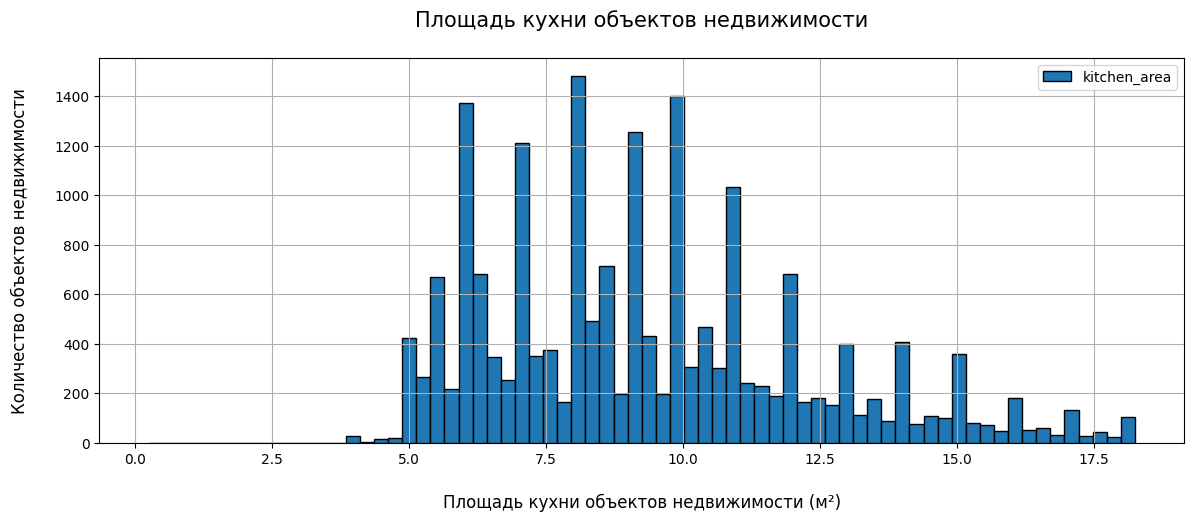

Минимальное значение - 4.0
Первый квартиль равен - 7.0
Медиана равна - 9.0
Среднее значение - 10.0
Третий квартиль равен - 11.5
Максимальное значение - 35.0


In [52]:
q1_kitch_area = data['kitchen_area'].quantile(.25) # первый квартиль Q1
q2_kitch_area = data['kitchen_area'].median() # медиана
avg_kitch_area = data['kitchen_area'].mean() # среднее значение 
q3_kitch_area = data['kitchen_area'].quantile(.75) # третий квартиль Q3
iqr_kitch_area = q3_kitch_area - q1_kitch_area # межквартильный размах IQR
min_kitch_area = data['kitchen_area'].min() # минимальное значение 
max_kitch_area = data['kitchen_area'].max() # максмальное значение 
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов, также расчитаем для более наглядного вывода
# медиану, среднее значение, минимальное значение, максмальное значение

data['kitchen_area'].hist(bins=70, range=((q1_kitch_area - 1.5 * iqr_kitch_area), (q3_kitch_area + 1.5 * iqr_kitch_area)), \
figsize=(14, 5), ec='black', legend=True)
plt.title('Площадь кухни объектов недвижимости' + "\n", fontsize=15)
plt.xlabel("\n" + 'Площадь кухни объектов недвижимости (м²)', fontsize=12)
plt.ylabel('Количество объектов недвижимости' + "\n", fontsize=12)
plt.show()
# Построим гистограмму 

print(f'''Минимальное значение - {min_kitch_area}
Первый квартиль равен - {q1_kitch_area}
Медиана равна - {q2_kitch_area}
Среднее значение - {avg_kitch_area.round(1)}
Третий квартиль равен - {q3_kitch_area}
Максимальное значение - {max_kitch_area}''')
# Выведем на экран необходимые для вывода параметры

Исключая выбросы, рассматриваемый диапазон примерно до 19 м². Большая часть объектов недвижимости имеют площадь кухни от 5 м² до 12 м². Самый распространенный вариант - около 10 м². Площадь кухни более 13 м² и менее 5 м² встречается редко. Среднее значение - 10 м², медиана 9 м².

#### Цена объекта

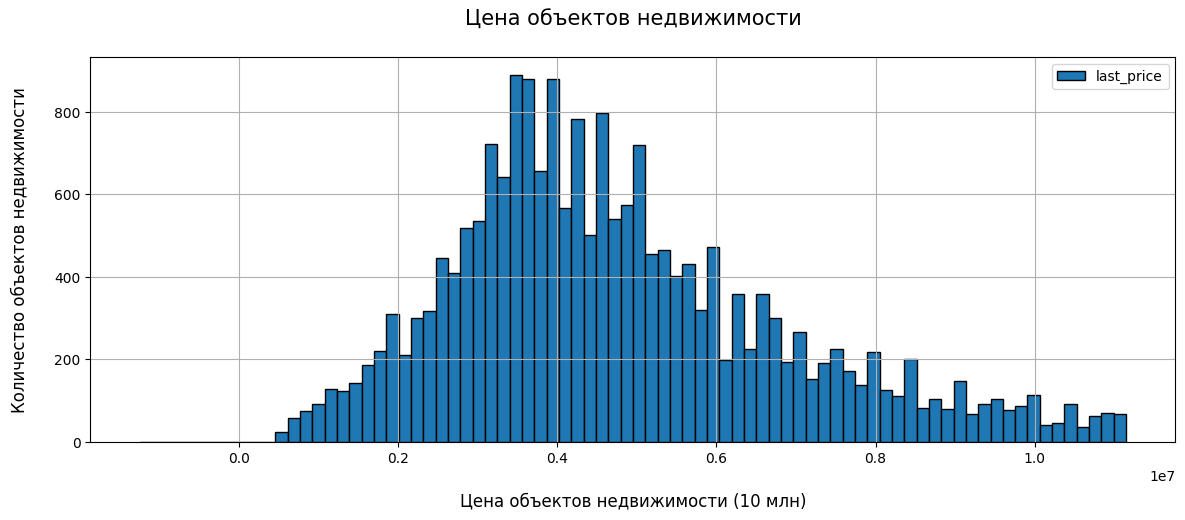

Минимальное значение - 550000
Первый квартиль равен - 3400000.0
Медиана равна - 4550000.0
Среднее значение - 5606713.5
Третий квартиль равен - 6500000.0
Максимальное значение - 36000000


In [53]:
q1_price = data['last_price'].quantile(.25) # первый квартиль Q1
q2_price = data['last_price'].median() # медиана
avg_price = data['last_price'].mean() # среднее значение 
q3_price = data['last_price'].quantile(.75) # третий квартиль Q3
iqr_price = q3_price - q1_price # межквартильный размах IQR
min_price = data['last_price'].min() # минимальное значение 
max_price = data['last_price'].max() # максмальное значение 
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов, также расчитаем для более наглядного вывода
# медиану, среднее значение, минимальное значение, максмальное значение

data['last_price'].hist(bins=80, range=((q1_price - 1.5 * iqr_price), (q3_price + 1.5 * iqr_price)), \
figsize=(14, 5), ec='black', legend=True)
plt.title('Цена объектов недвижимости' + "\n", fontsize=15)
plt.xlabel("\n" + 'Цена объектов недвижимости (10 млн)', fontsize=12)
plt.ylabel('Количество объектов недвижимости' + "\n", fontsize=12)
plt.show()
# Построим гистограмму

print(f'''Минимальное значение - {min_price}
Первый квартиль равен - {q1_price}
Медиана равна - {q2_price}
Среднее значение - {avg_price.round(1)}
Третий квартиль равен - {q3_price}
Максимальное значение - {max_price}''')
# Выведем на экран необходимые для вывода параметры

Исключая выбросы, рассматриваем диапазон до примерно 12 млн руб. Большинство объектов недвижимости имеют цену в пределах от 3 млн. руб. до 5 млн. руб.. Самый распространенный вариант - около 3.5 млн.руб.. Вариантов с ценой более 10 млн меньше. Среднее значение - 5,6 млн, медиана 4,5 млн.

#### Количество комнат

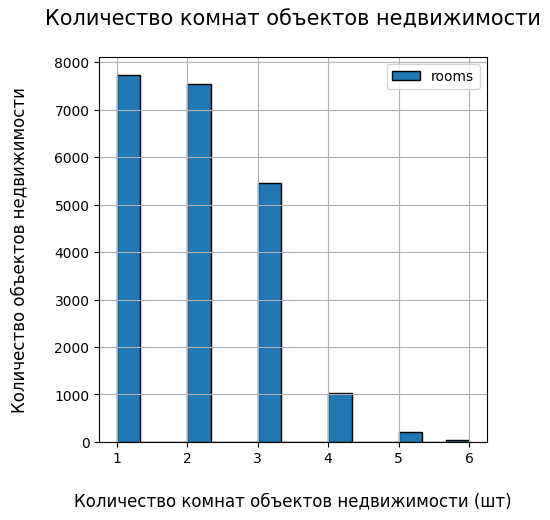

Минимальное значение - 0
Первый квартиль равен - 1.0
Медиана равна - 2.0
Среднее значение - 2.0
Третий квартиль равен - 3.0
Максимальное значение - 6


In [54]:
q1_room = data['rooms'].quantile(.25) # первый квартиль Q1
q2_room = data['rooms'].median() # медиана
avg_room = data['rooms'].mean() # среднее значение 
q3_room = data['rooms'].quantile(.75) # третий квартиль Q3
iqr_room = q3_room - q1_room # межквартильный размах IQR
min_room = data['rooms'].min() # минимальное значение 
max_room = data['rooms'].max() # максмальное значение 
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов, также расчитаем для более наглядного вывода
# медиану, среднее значение, минимальное значение, максмальное значение

data['rooms'].hist(bins=15, range=(1, (q3_room + 1.5 * iqr_room)), \
figsize=(5, 5), ec='black', legend=True)
plt.title('Количество комнат объектов недвижимости' + "\n", fontsize=15)
plt.xlabel("\n" + 'Количество комнат объектов недвижимости (шт)', fontsize=12)
plt.ylabel('Количество объектов недвижимости' + "\n", fontsize=12)
plt.show()
# Построим гистограмму

print(f'''Минимальное значение - {min_room}
Первый квартиль равен - {q1_room}
Медиана равна - {q2_room}
Среднее значение - {avg_room.round(1)}
Третий квартиль равен - {q3_room}
Максимальное значение - {max_room}''')
# Выведем на экран необходимые для вывода параметры

Исключая некорректные значения (0 комнат) и выбросы, рассматриваемый диапазон от 1 до 5 комнат. Большая часть объектов недвижимости имеют 1 или 2 комнаты, чуть меньше - 3 комнаты. Объектов, с кол-вом комнат 4-5 относительно немного. Среднее и медиана 2 комнаты.

#### Высота потолков

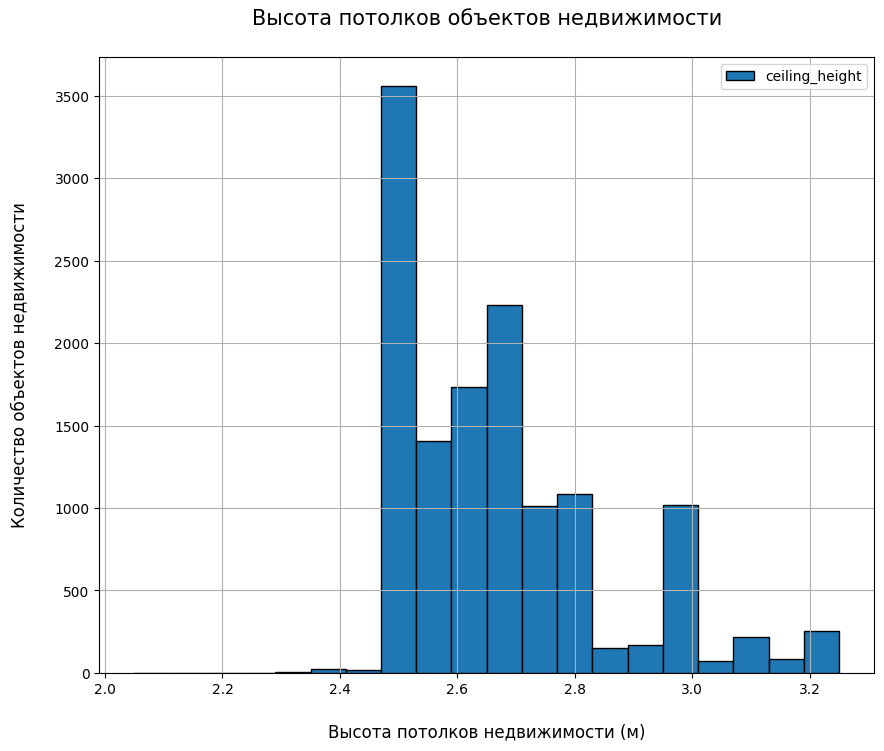

Минимальное значение - 2.3
Первый квартиль равен - 2.5
Медиана равна - 2.65
Среднее значение - 2.7
Третий квартиль равен - 2.8
Максимальное значение - 5.0


In [55]:
q1_ceiling = data['ceiling_height'].quantile(.25) # первый квартиль Q1
q2_ceiling = data['ceiling_height'].median() # медиана
avg_ceiling = data['ceiling_height'].mean() # среднее значение 
q3_ceiling = data['ceiling_height'].quantile(.75) # третий квартиль Q3
iqr_ceiling = q3_ceiling - q1_ceiling # межквартильный размах IQR
min_ceiling = data['ceiling_height'].min() # минимальное значение 
max_ceiling = data['ceiling_height'].max() # максмальное значение 
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов, также расчитаем для более наглядного вывода
# медиану, среднее значение, минимальное значение, максмальное значение

data['ceiling_height'].hist(bins=20, range=((q1_ceiling - 1.5 * iqr_ceiling), (q3_ceiling + 1.5 * iqr_ceiling)), \
figsize=(10, 8), ec='black', legend=True)
plt.title('Высота потолков объектов недвижимости' + "\n", fontsize=15)
plt.xlabel("\n" + 'Высота потолков недвижимости (м)', fontsize=12)
plt.ylabel('Количество объектов недвижимости' + "\n", fontsize=12)
plt.show()
# Построим гистограмму

print(f'''Минимальное значение - {min_ceiling}
Первый квартиль равен - {q1_ceiling}
Медиана равна - {q2_ceiling}
Среднее значение - {avg_ceiling.round(1)}
Третий квартиль равен - {q3_ceiling}
Максимальное значение - {max_ceiling}''')
# Выведем на экран необходимые для вывода параметры

Исключая некорректные значения и выбросы, рассматриваем диапазон от 2,5 м. до 2,9 м.. Большинство объектов недвижимости имеют высоту потолков 2,7 м.. Реже представлены варианты от 2,8 м.. Среднее 2,7 м. и медиана 2,7 м..

#### Этаж квартиры

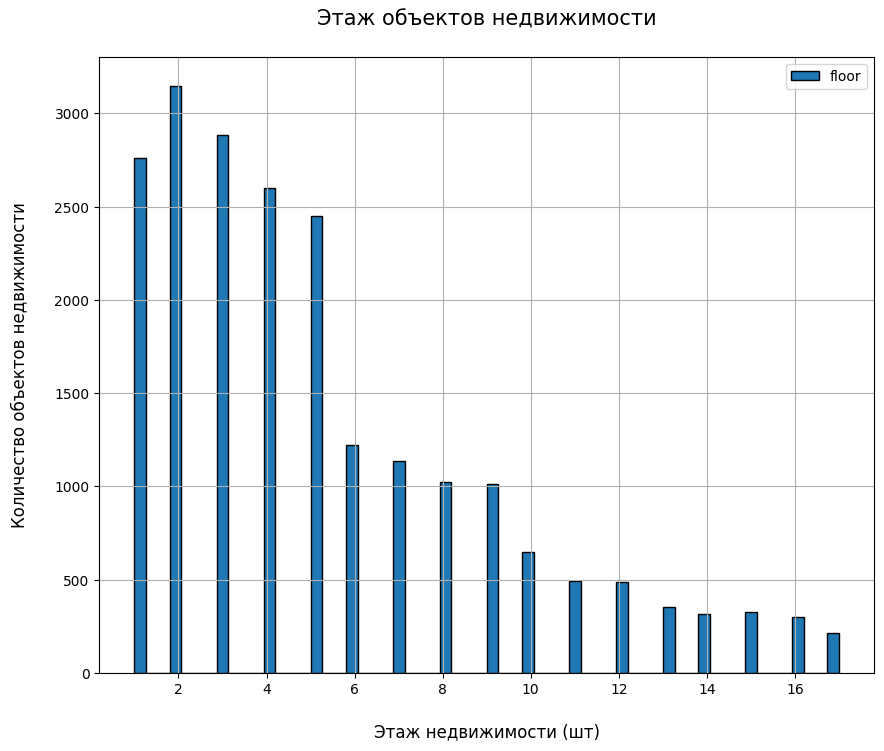

Минимальное значение - 1
Первый квартиль равен - 2.0
Медиана равна - 4.0
Среднее значение - 5.9
Третий квартиль равен - 8.0
Максимальное значение - 27


In [56]:
q1_floor = data['floor'].quantile(.25) # первый квартиль Q1
q2_floor = data['floor'].median() # медиана
avg_floor = data['floor'].mean() # среднее значение 
q3_floor = data['floor'].quantile(.75) # третий квартиль Q3
iqr_floor = q3_floor - q1_floor # межквартильный размах IQR
min_floor = data['floor'].min() # минимальное значение 
max_floor = data['floor'].max() # максмальное значение 
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов, также расчитаем для более наглядного вывода
# медиану, среднее значение, минимальное значение, максмальное значение

data['floor'].hist(bins=60, range=(1, (q3_floor + 1.5 * iqr_floor)), \
figsize=(10, 8), ec='black', legend=True)
plt.title('Этаж объектов недвижимости' + "\n", fontsize=15)
plt.xlabel("\n" + 'Этаж недвижимости (шт)', fontsize=12)
plt.ylabel('Количество объектов недвижимости' + "\n", fontsize=12)
plt.show()
# Построим гистограмму

print(f'''Минимальное значение - {min_floor}
Первый квартиль равен - {q1_floor}
Медиана равна - {q2_floor}
Среднее значение - {avg_floor.round(1)}
Третий квартиль равен - {q3_floor}
Максимальное значение - {max_floor}''')
# Выведем на экран необходимые для вывода параметры

Исключая некорректные значения и выбросы, рассматриваемый диапазон с 1 по 17 этаж. Большинство объектов недвижимости расположены с 1 по 5 этаж. Реже представлены варианты с 6 по 9. Среднее 6 этаж и медиана 4 этаж.

#### Тип этажа квартиры («первый», «последний», «другой»)

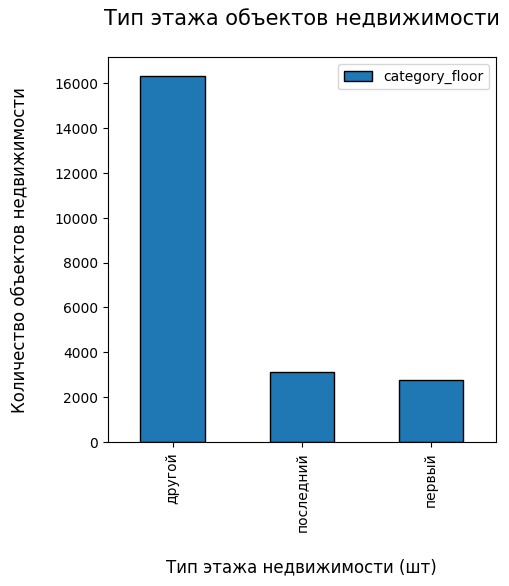

In [57]:
data['category_floor'].value_counts().plot.bar(figsize=(5, 5), ec='black', legend=True)
plt.title('Тип этажа объектов недвижимости' + "\n", fontsize=15)
plt.xlabel("\n" + 'Тип этажа недвижимости (шт)', fontsize=12)
plt.ylabel('Количество объектов недвижимости' + "\n", fontsize=12)
plt.show()
# Построим гистограмму для категориальных значений

Видно, что объекты недвижимости, расположенные на первом и последним этажах имеют примерно одинаковые значения. В основном объекты расположены на этажах между первым и последним.

#### Общее количество этажей в доме

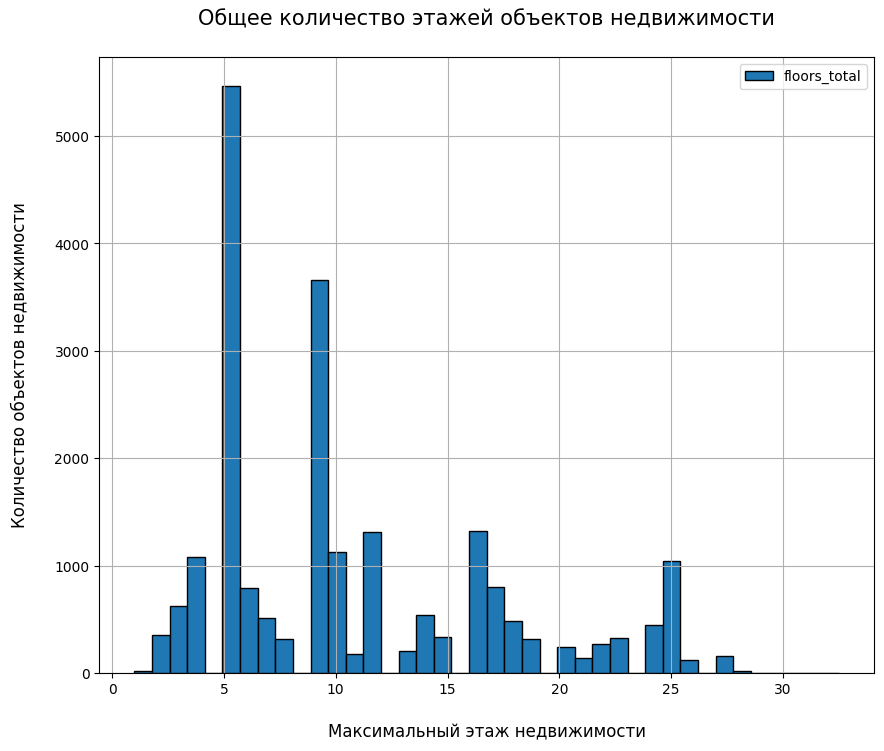

Минимальное значение - 1
Первый квартиль равен - 5.0
Медиана равна - 9.0
Среднее значение - 10.7
Третий квартиль равен - 16.0
Максимальное значение - 29


In [58]:
q1_floor_tot = data['floors_total'].quantile(.25) # первый квартиль Q1
q2_floor_tot = data['floors_total'].median() # медиана
avg_floor_tot = data['floors_total'].mean() # среднее значение 
q3_floor_tot = data['floors_total'].quantile(.75) # третий квартиль Q3
iqr_floor_tot = q3_floor_tot - q1_floor_tot # межквартильный размах IQR
min_floor_tot = data['floors_total'].min() # минимальное значение 
max_floor_tot = data['floors_total'].max() # максмальное значение 
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов, также расчитаем для более наглядного вывода
# медиану, среднее значение, минимальное значение, максмальное значение

data['floors_total'].hist(bins=40, range=(1, (q3_floor_tot + 1.5 * iqr_floor_tot)), \
figsize=(10, 8), ec='black', legend=True)
plt.title('Общее количество этажей объектов недвижимости' + "\n", fontsize=15)
plt.xlabel("\n" + 'Максимальный этаж недвижимости', fontsize=12)
plt.ylabel('Количество объектов недвижимости' + "\n", fontsize=12)
plt.show()
# Построим гистограмму

print(f'''Минимальное значение - {min_floor_tot}
Первый квартиль равен - {q1_floor_tot}
Медиана равна - {q2_floor_tot}
Среднее значение - {avg_floor_tot.round(1)}
Третий квартиль равен - {q3_floor_tot}
Максимальное значение - {max_floor_tot}''')
# Выведем на экран необходимые для вывода параметры

Исключая некорректные значения и выбросы, рассматриваемый диапазон с 1 по 29 этаж. Большинство объектов недвижимости - это 5-ти , 9-ти этажки. Остальные варианты представлены реже. Среднее 10 этаж и медиана 9 этаж.

#### Расстояние до центра города в метрах

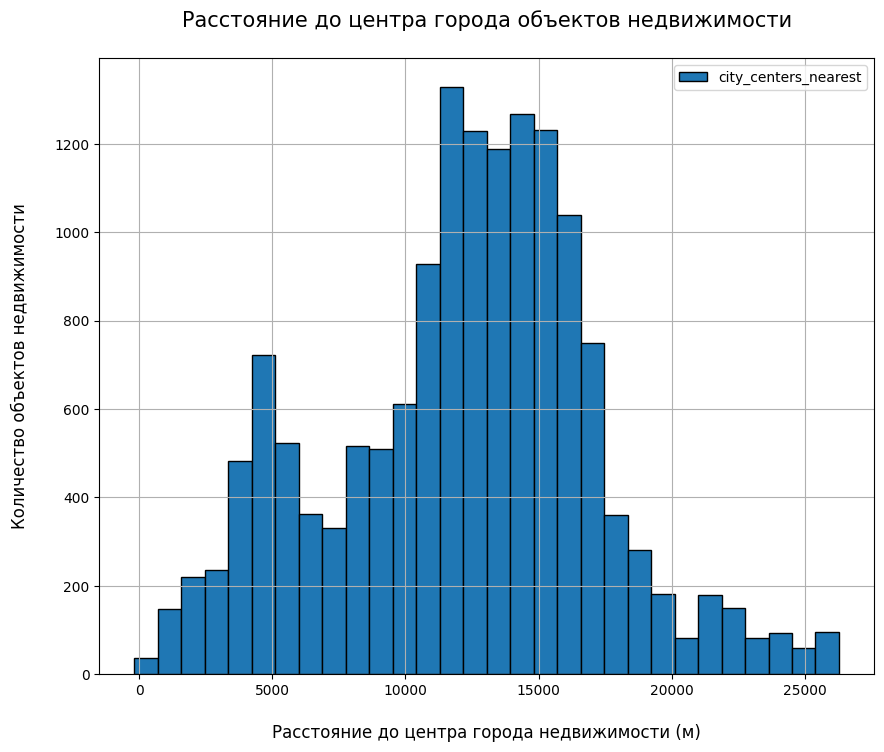

Минимальное значение - 181.0
Первый квартиль равен - 9747.0
Медиана равна - 13242.0
Среднее значение - 14440.1
Третий квартиль равен - 16360.0
Максимальное значение - 65952.0


In [59]:
q1_centers_nearest = data['city_centers_nearest'].quantile(.25) # первый квартиль Q1
q2_centers_nearest = data['city_centers_nearest'].median() # медиана
avg_centers_nearest = data['city_centers_nearest'].mean() # среднее значение 
q3_centers_nearest = data['city_centers_nearest'].quantile(.75) # третий квартиль Q3
iqr_centers_nearest = q3_centers_nearest - q1_centers_nearest # межквартильный размах IQR
min_centers_nearest = data['city_centers_nearest'].min() # минимальное значение 
max_centers_nearest = data['city_centers_nearest'].max() # максмальное значение 
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов, также расчитаем для более наглядного вывода
# медиану, среднее значение, минимальное значение, максмальное значение

data['city_centers_nearest'].hist(bins=30, range=((q1_centers_nearest - 1.5 * iqr_centers_nearest),\
(q3_centers_nearest + 1.5 * iqr_centers_nearest)), figsize=(10, 8), ec='black', legend=True)
plt.title('Расстояние до центра города объектов недвижимости' + "\n", fontsize=15)
plt.xlabel("\n" + 'Расстояние до центра города недвижимости (м)', fontsize=12)
plt.ylabel('Количество объектов недвижимости' + "\n", fontsize=12)
plt.show()
# Построим гистограмму

print(f'''Минимальное значение - {min_centers_nearest}
Первый квартиль равен - {q1_centers_nearest}
Медиана равна - {q2_centers_nearest}
Среднее значение - {avg_centers_nearest.round(1)}
Третий квартиль равен - {q3_centers_nearest}
Максимальное значение - {max_centers_nearest}''')
# Выведем на экран необходимые для вывода параметры

Исключая некорректные значения и выбросы, рассматриваемый диапазон с 3 км. до 25 км.. Большинство объектов недвижимости расположены на удалении 12 км. - 16 км. от центра. Остальные варианты представлены реже. Среднее 14,4 км. и медиана 13 км..

#### Расстояние до ближайшего аэропорта

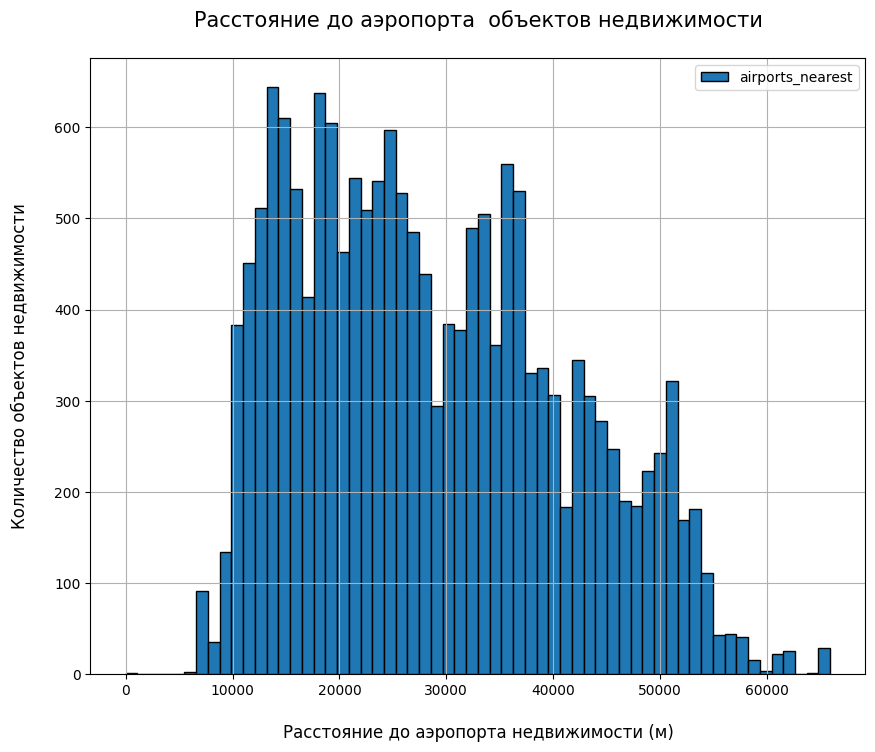

Минимальное значение - 0.0
Первый квартиль равен - 18396.0
Медиана равна - 26904.0
Среднее значение - 28852.4
Третий квартиль равен - 37407.0
Максимальное значение - 84853.0


In [60]:
q1_airports_nearest = data['airports_nearest'].quantile(.25) # первый квартиль Q1
q2_airports_nearest = data['airports_nearest'].median() # медиана
avg_airports_nearest = data['airports_nearest'].mean() # среднее значение 
q3_airports_nearest = data['airports_nearest'].quantile(.75) # третий квартиль Q3
iqr_airports_nearest = q3_airports_nearest - q1_airports_nearest # межквартильный размах IQR
min_airports_nearest = data['airports_nearest'].min() # минимальное значение 
max_airports_nearest = data['airports_nearest'].max() # максмальное значение 
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов, также расчитаем для более наглядного вывода
# медиану, среднее значение, минимальное значение, максмальное значение

data['airports_nearest'].hist(bins=60, range=(0,\
(q3_airports_nearest + 1.5 * iqr_airports_nearest)), figsize=(10, 8), ec='black', legend=True)
plt.title('Расстояние до аэропорта  объектов недвижимости' + "\n", fontsize=15)
plt.xlabel("\n" + 'Расстояние до аэропорта недвижимости (м)', fontsize=12)
plt.ylabel('Количество объектов недвижимости' + "\n", fontsize=12)
plt.show()
# Построим гистограмму

print(f'''Минимальное значение - {min_airports_nearest}
Первый квартиль равен - {q1_airports_nearest}
Медиана равна - {q2_airports_nearest}
Среднее значение - {avg_airports_nearest.round(1)}
Третий квартиль равен - {q3_airports_nearest}
Максимальное значение - {max_airports_nearest}''')
# Выведем на экран необходимые для вывода параметры

Рассматриваемый диапазон с 0 км. до 65 км.. Большинство объектов недвижимости расположены на удалении от аэропорта на расстоянии 15 км. - 25 км.. Ближайший к аэропорту объект на расстоянии 6,5 км. Среднее 28,8 км и медиана 26,7 км.

#### Расстояние до ближайшего парка в метрах

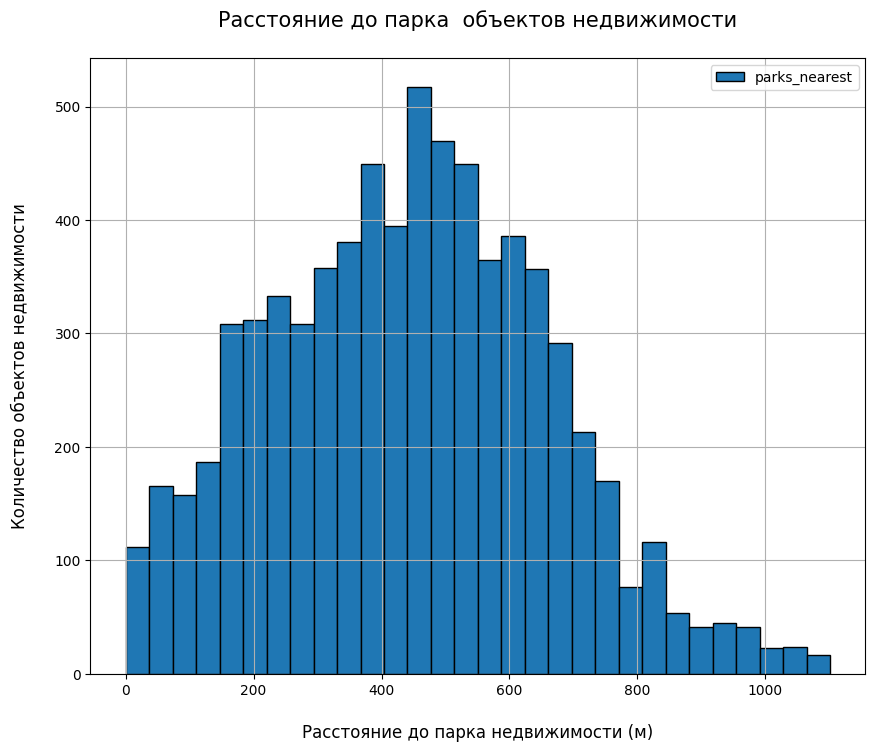

Минимальное значение - 1.0
Первый квартиль равен - 289.0
Медиана равна - 456.0
Среднее значение - 492.8
Третий квартиль равен - 614.0
Максимальное значение - 3190.0


In [61]:
q1_parks_nearest = data['parks_nearest'].quantile(.25) # первый квартиль Q1
q2_parks_nearest = data['parks_nearest'].median() # медиана
avg_parks_nearest = data['parks_nearest'].mean() # среднее значение 
q3_parks_nearest = data['parks_nearest'].quantile(.75) # третий квартиль Q3
iqr_parks_nearest = q3_parks_nearest - q1_parks_nearest # межквартильный размах IQR
min_parks_nearest = data['parks_nearest'].min() # минимальное значение 
max_parks_nearest = data['parks_nearest'].max() # максмальное значение 
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов, также расчитаем для более наглядного вывода
# медиану, среднее значение, минимальное значение, максмальное значение

data['parks_nearest'].hist(bins=30, range=(0,\
(q3_parks_nearest + 1.5 * iqr_parks_nearest)), figsize=(10, 8), ec='black', legend=True)
plt.title('Расстояние до парка  объектов недвижимости' + "\n", fontsize=15)
plt.xlabel("\n" + 'Расстояние до парка недвижимости (м)', fontsize=12)
plt.ylabel('Количество объектов недвижимости' + "\n", fontsize=12)
plt.show()
# Построим гистограмму

print(f'''Минимальное значение - {min_parks_nearest}
Первый квартиль равен - {q1_parks_nearest}
Медиана равна - {q2_parks_nearest}
Среднее значение - {avg_parks_nearest.round(1)}
Третий квартиль равен - {q3_parks_nearest}
Максимальное значение - {max_parks_nearest}''')
# Выведем на экран необходимые для вывода параметры

Рассматриваемый диапазон с 0 м. до 1100 м.. Большинство объектов недвижимости расположены на удалении от ближайшего парка на расстоянии 400 м. - 600 м.. Ближайшие к парку объект на расстоянии 500 м. Среднее 490 м. и медиана 454 м..

#### День и месяц публикации объявления

##### День публикации объявления

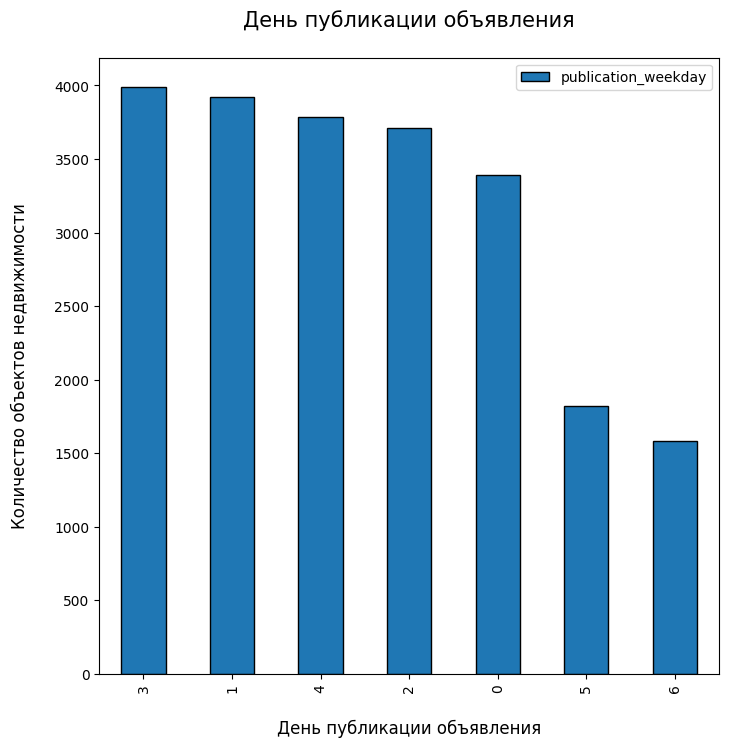

In [62]:
data['publication_weekday'].value_counts().plot.bar(figsize=(8, 8), ec='black', legend=True)
plt.title('День публикации объявления' + "\n", fontsize=15)
plt.xlabel("\n" + 'День публикации объявления', fontsize=12)
plt.ylabel('Количество объектов недвижимости' + "\n", fontsize=12)
plt.show()
# Построим гистограмму для категориальных значений

По графику видно, что чаще всего объявления публиковали в будние дни в середине недели. Реже в выходные дни.

##### Месяц публикации объявления

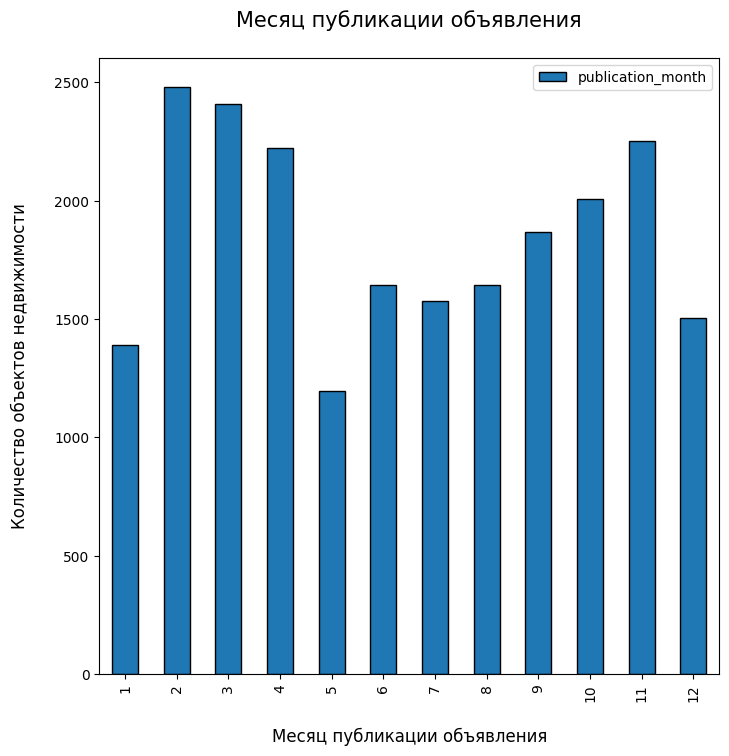

In [63]:
data['publication_month'].value_counts(sort=False).plot.bar(figsize=(8, 8), ec='black', legend=True)
plt.title('Месяц публикации объявления' + "\n", fontsize=15)
plt.xlabel("\n" + 'Месяц публикации объявления', fontsize=12)
plt.ylabel('Количество объектов недвижимости' + "\n", fontsize=12)
plt.show()
# Построим гистограмму для категориальных значений

По графику видно, что чаще всего объявления публиковали после январских праздников, в феврале. Наименьшие показатели в январе и мае. Можно предположить, что это из-за большого кол-ва выходных и праздничных дней.

### 5. Изучим, как быстро продавались квартиры (столбец `days_exposition`). Этот параметр показывает, сколько дней было размещено каждое объявление. 
 
Построим гистограмму.
Посчитаем среднее и медиану.
Опишем, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

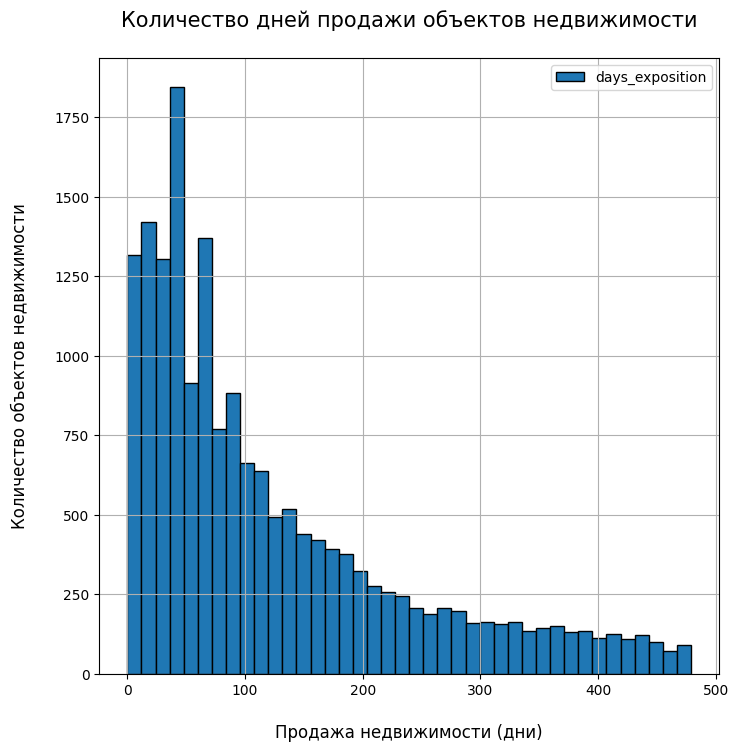

Минимальное значение - 3.0000000000000004
Первый квартиль равен - 44.00000000000001
Медиана равна - 92.0
Среднее значение - 166.0
Третий квартиль равен - 218.0
Максимальное значение - 1000.0


In [64]:
q1_days_exposition = data['days_exposition'].quantile(.25) # первый квартиль Q1
q2_days_exposition = data['days_exposition'].median() # медиана
avg_days_exposition = data['days_exposition'].mean() # среднее значение 
q3_days_exposition = data['days_exposition'].quantile(.75) # третий квартиль Q3
iqr_days_exposition = q3_days_exposition - q1_days_exposition # межквартильный размах IQR
min_days_exposition = data['days_exposition'].min() # минимальное значение 
max_days_exposition = data['days_exposition'].max() # максмальное значение 
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов, также расчитаем для более наглядного вывода
# медиану, среднее значение, минимальное значение, максмальное значение

data['days_exposition'].hist(bins=40, range=(0,\
(q3_days_exposition + 1.5 * iqr_days_exposition)), figsize=(8, 8), ec='black', legend=True)
plt.title('Количество дней продажи объектов недвижимости' + "\n", fontsize=15)
plt.xlabel("\n" + 'Продажа недвижимости (дни)', fontsize=12)
plt.ylabel('Количество объектов недвижимости' + "\n", fontsize=12)
plt.show()
# Построим гистограмму

print(f'''Минимальное значение - {min_days_exposition}
Первый квартиль равен - {q1_days_exposition}
Медиана равна - {q2_days_exposition}
Среднее значение - {avg_days_exposition.round(1)}
Третий квартиль равен - {q3_days_exposition}
Максимальное значение - {max_days_exposition}''')
# Выведем на экран необходимые для вывода параметры

Судя по графику, чаще всего квартиры продают в интервале до 60 дней. Но тут важно учесть, что возможно квартира не продана, а просто закрылось объявление в связи с истекшим сроком публикации. Также объявление может остаться на сайте, даже если объект недвижимости уже фактически продан, просто забыли снять объявление. В этом случае если пользователь не потдвердит актуальность объявления, оно может быть автоматически удалено.

Теперь посмотрим на среднее и медиану.
Среднее время продажи объекта недвижимости 181 день, медианное - 95 дней. Максимальное значение - 1580 дней. Смотря на график, можно увидеть длиный "хвост". Больших значений достаточно много. Среднее значение в 2 раза больше медианного. 

Оценка времени продажи: быстрая продажа - до 60 дней, нормальная продажа - от 60 до 231 дней, долгая продажа - от 231 до 510 дней. Продажи после 510 дней - выбросы.

### 6. Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Изучим, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Построим графики, которые покажут зависимость цены от указанных выше параметров.

In [65]:
corr = ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'category_floor', \
'publication_weekday', 'publication_month', 'publication_year']
# Создадим список для построения сводной таблицы с параметрами для проверки

In [66]:
data[corr].corr().head(1)
# Выведем на экран интересующую нас корреляцию

,last_price,total_area,living_area,kitchen_area,rooms,publication_weekday,publication_month,publication_year
last_price,1.0,0.767755,0.662663,0.56899,0.477621,-0.012914,0.004191,-0.014168


Теперь построим графики (пятна рассеяния) , которые покажут зависимость цены от указанных выше параметров. 

Зависимость общей площади от стоимости квартиры:

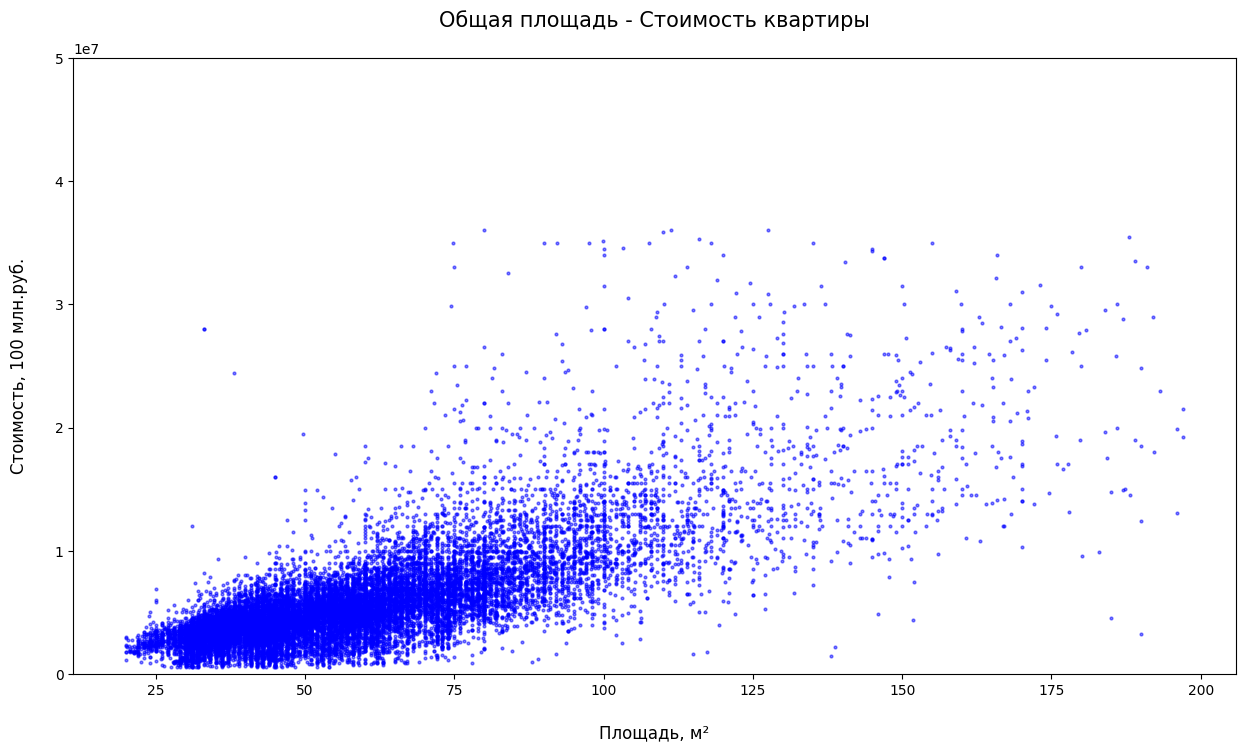

In [67]:
data.plot(kind='scatter', y='last_price', x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Общая площадь - Стоимость квартиры' + "\n", fontsize=15)
plt.xlabel("\n" + 'Площадь, м²', fontsize=12)
plt.ylabel('Стоимость, 100 млн.руб.' + "\n", fontsize=12)
plt.ylim(0, 50000000)
plt.show()
# используем тип графика scatter

Зависимость жилой площади от стоимости квартиры:

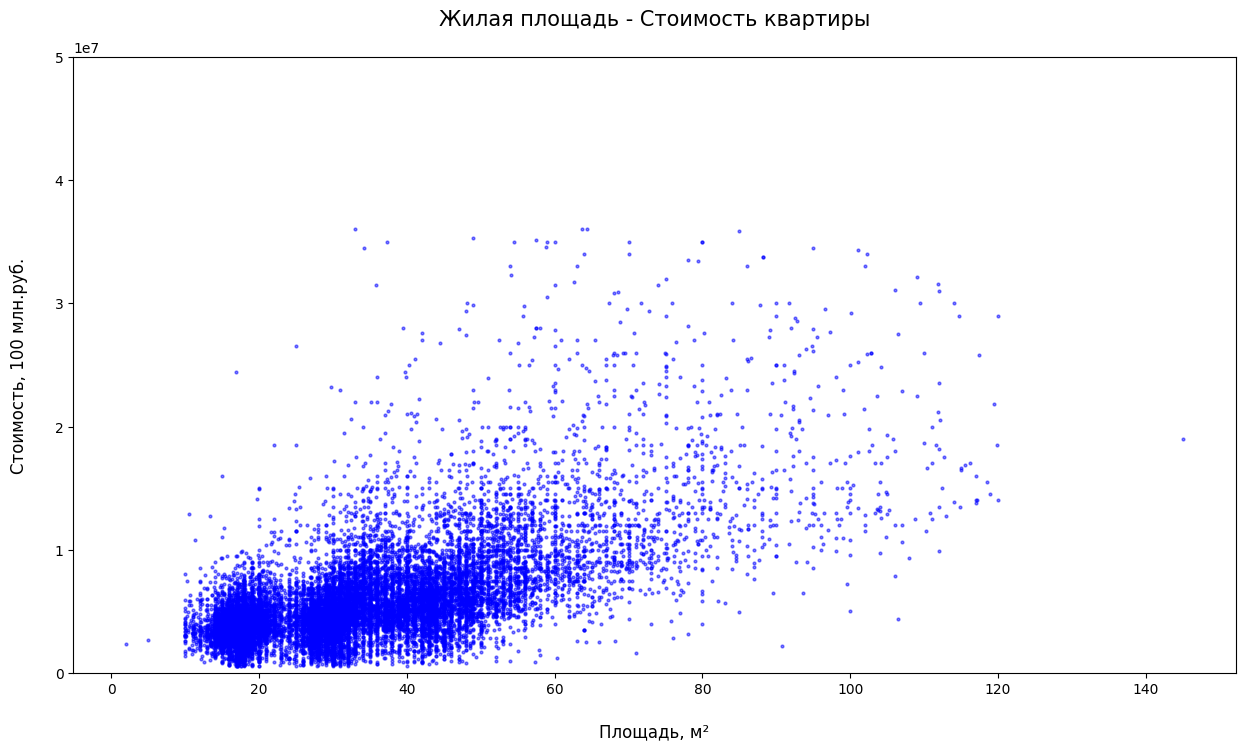

In [68]:
data.plot(kind ='scatter', x='living_area', y ='last_price', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)

plt.title('Жилая площадь - Стоимость квартиры' + "\n", fontsize=15)
plt.xlabel("\n" + 'Площадь, м²', fontsize=12)
plt.ylabel('Стоимость, 100 млн.руб.' + "\n", fontsize=12)
plt.ylim(0, 50000000)
plt.show()
# используем тип графика scatter

Зависимость площади кухни от стоимости квартиры:

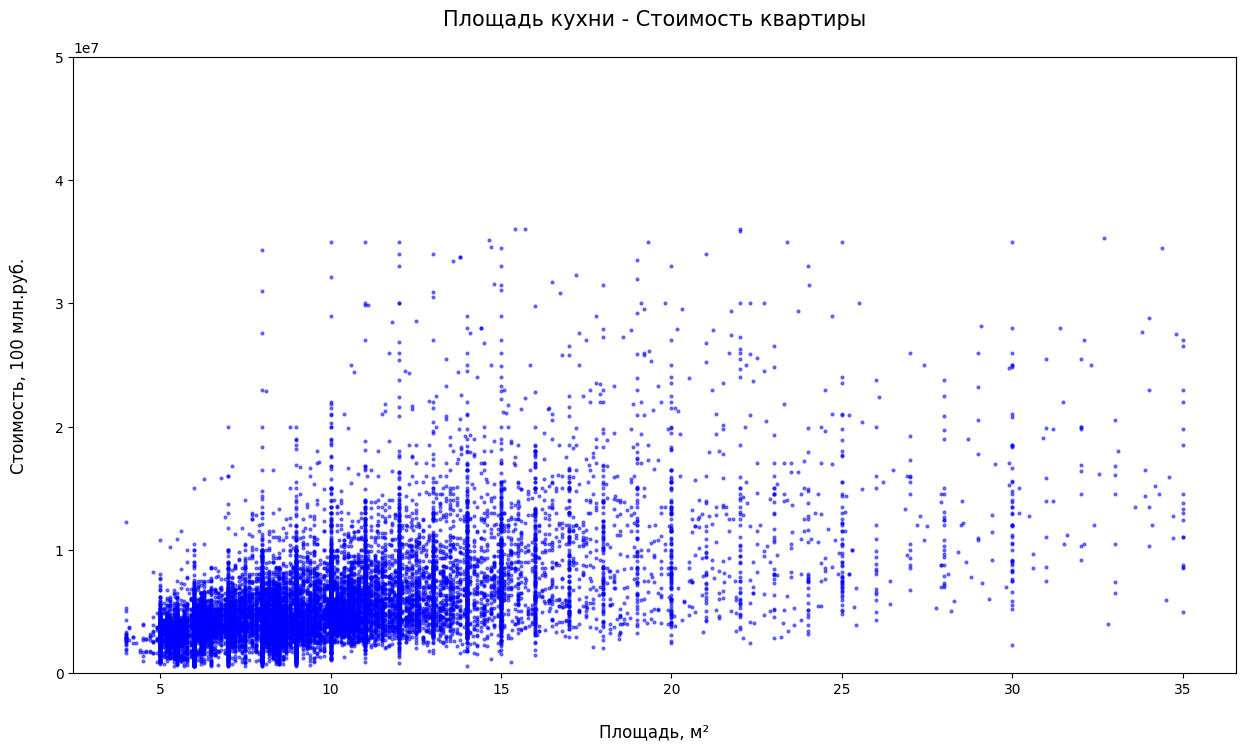

In [69]:
data.plot( kind ='scatter', x='kitchen_area', y ='last_price', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)

plt.title('Площадь кухни - Стоимость квартиры' + "\n", fontsize=15)
plt.xlabel("\n" + 'Площадь, м²', fontsize=12)
plt.ylabel('Стоимость, 100 млн.руб.' + "\n", fontsize=12)
plt.ylim(0, 50000000)
plt.show()
# используем тип графика scatter

Зависимость количества комнат от стоимости квартиры:

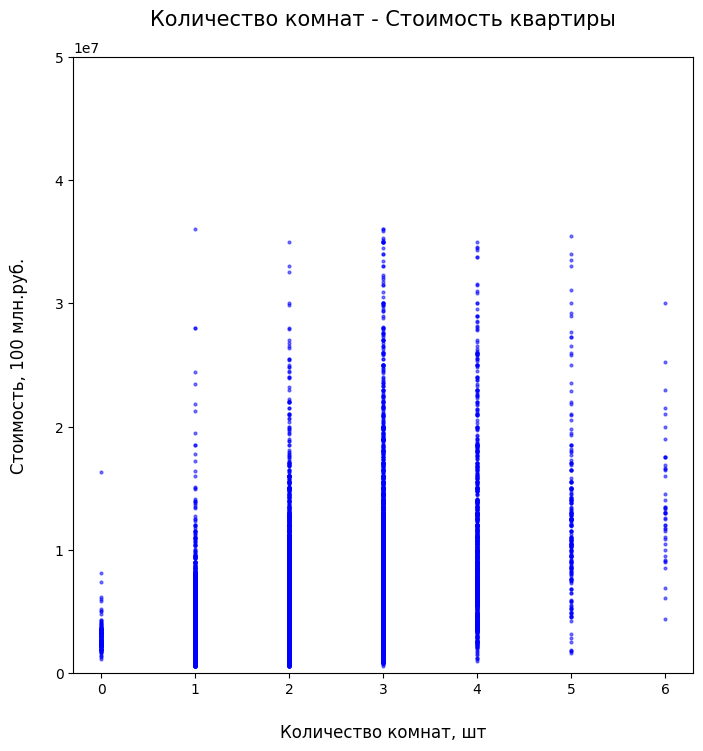

In [70]:
data.plot(kind ='scatter', x='rooms', y ='last_price', alpha=0.5, subplots=True, figsize=(8,8), c = 'b', s = 4)

plt.title('Количество комнат - Стоимость квартиры' + "\n", fontsize=15)
plt.xlabel("\n" + 'Количество комнат, шт', fontsize=12)
plt.ylabel('Стоимость, 100 млн.руб.' + "\n", fontsize=12)
plt.ylim(0, 50000000)
plt.show()
# используем тип графика scatter

Зависимость категории этажа и стоимости квартиры:

Чтобы посмотреть связь между этажом и стоимостью квартиры построим сводную таблицу и визуализируем результаты на графике.

,mean,count,median
category_floor,,,
другой,5.855120e+06,16334,4750000
первый,4.461275e+06,2762,3900000
последний,5.318772e+06,3104,4200000


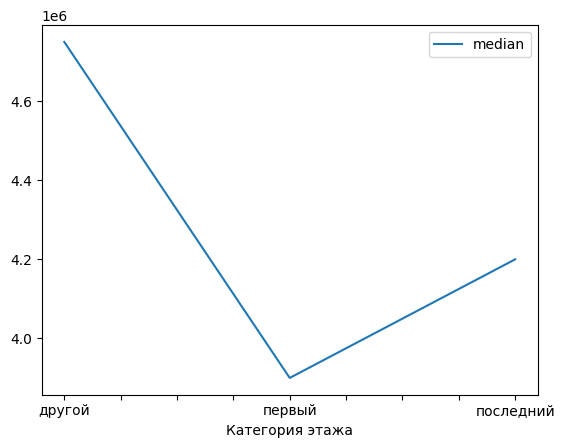

In [71]:
pivot_table_floor_category = data.pivot_table(index = 'category_floor', values = 'last_price',\
aggfunc = ['mean', 'count', 'median'])
# Создаем сводную таблицу
pivot_table_floor_category.columns = ['mean', 'count', 'median']
# Присваиваем названия колонкам

pivot_table_floor_category.plot(y = 'median', legend=True)
plt.xlabel('Категория этажа')
#Строим зависимость
pivot_table_floor_category

Зависимость даты размещения (день недели) и стоимости квартиры:

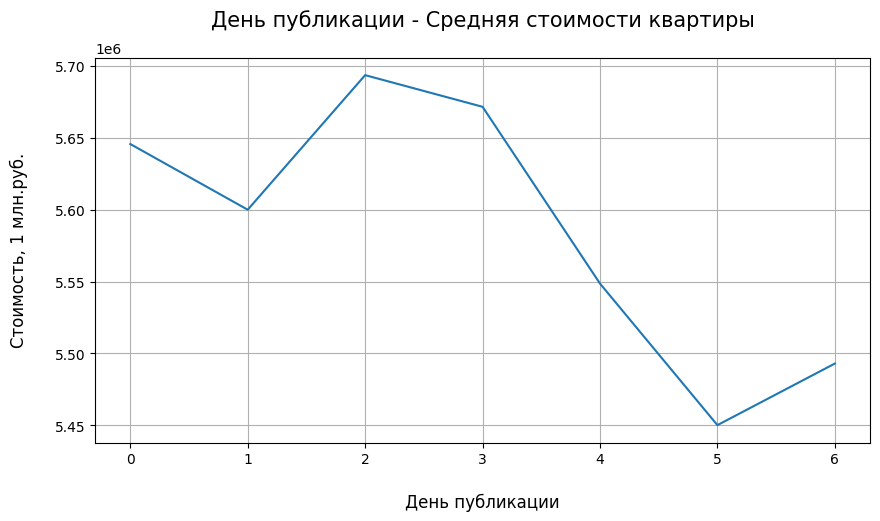

In [72]:
data.groupby('publication_weekday')['last_price'].mean().plot(x = 'publication_year', \
                                                              y = 'days_exposition', grid=True, figsize=(10, 5));
plt.title('День публикации - Средняя стоимости квартиры' + "\n", fontsize=15)
plt.xlabel("\n" + 'День публикации', fontsize=12)
plt.ylabel('Стоимость, 1 млн.руб.' + "\n", fontsize=12)
plt.show()
# график дня недели от стоимости

Зависимость даты размещения (месяца) и стоимости квартиры:

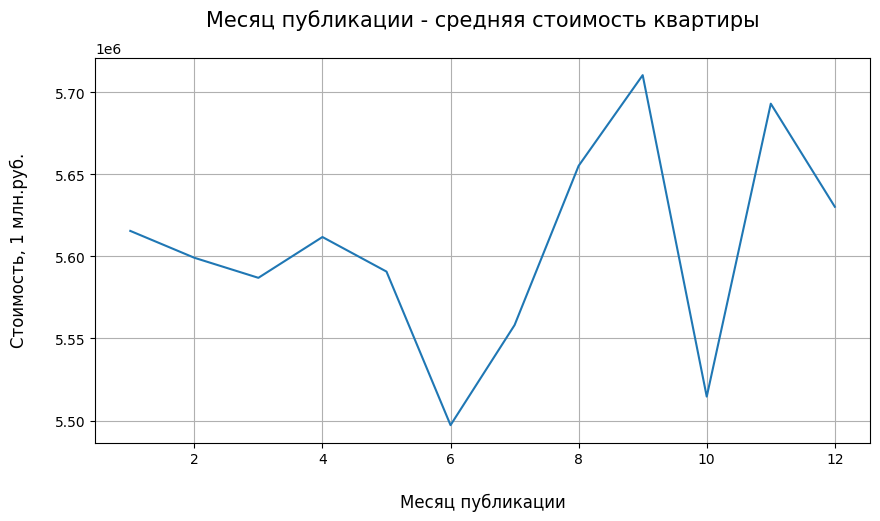

In [73]:
data.groupby('publication_month')['last_price'].mean().plot(x = 'publication_year', \
                                                            y = 'days_exposition', grid=True, figsize=(10, 5));
plt.title('Месяц публикации - средняя стоимость квартиры' + "\n", fontsize=15)
plt.xlabel("\n" + 'Месяц публикации', fontsize=12)
plt.ylabel('Стоимость, 1 млн.руб.' + "\n", fontsize=12)
plt.show()
# график месяца от стоимости

Зависимость даты размещения (года) и стоимости квартиры:

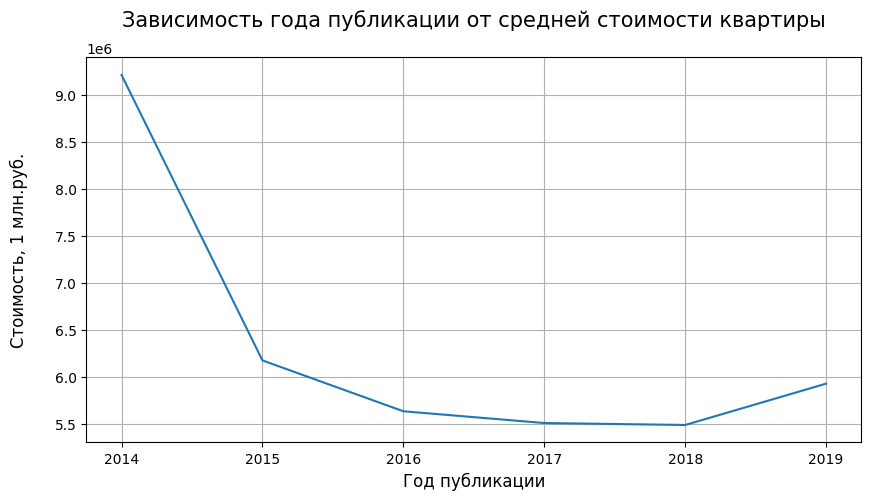

In [74]:
data.groupby('publication_year')['last_price'].mean().plot(x = 'publication_year',\
                                                           y = 'days_exposition', grid=True, figsize=(10, 5));
plt.title('Зависимость года публикации от средней стоимости квартиры' + "\n", fontsize=15)
plt.xlabel('Год публикации', fontsize=12)
plt.ylabel('Стоимость, 1 млн.руб.' + "\n", fontsize=12)
plt.show()
#график года от стоимости

Видно, что наибольшая положительная линейная связь между стоимостью квартиры и ее площадью. Зависимость прямопропорциональная - чем больше стоимость квартиры, тем больше ее площадь. Положительная линейная связь отмечается также между стоимостью квартиры и количеством комнат. Связь отличается примерно в 2 раза от связи между стоимостью квартиры и площадью. Соответственно, чем количество комнат больше, тем больше стоимость квартиры. Слабую отрициательную линейную связь можно заметить между стоимостью квартиры и расстоянием до центра города. Чем меньше расстояние до центра, тем больше стоимость квартиры. Между стоимостью квартиры и днем недели, месяцем или годом размещения объявления также отсутствует линейная связь.

На общую (полную) стоимость объекта больше всего влияет общая площадь квартиры и этаж расположения квартиры. Чем больше площадь, тем выше стоимость. На первом и последнем этажах стоимость квартиры меньше, чем на остальных. Дата публикации объявления на стоимость не влияет*



### 7. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [75]:
locality_ten = data['locality_name'].value_counts().head(10)
locality_ten
# Запишем в переменную locality_ten 10 населенных пунктов с наибольшим числом объявлений и выведем их на экран

Санкт-Петербург      14595
посёлок Мурино         559
Кудрово                452
посёлок Шушары         427
Всеволожск             393
Пушкин                 352
Колпино                335
посёлок Парголово      324
Гатчина                302
Выборг                 224
Name: locality_name, dtype: int64

In [76]:
locality_ten_pivot = data.query('locality_name in @locality_ten.index').pivot_table \
(index='locality_name', values='price_one_square_meter')
locality_ten_pivot = locality_ten_pivot.sort_values(by='price_one_square_meter', ascending=False)
round(locality_ten_pivot, 2)
# Выведем среднюю цену за кв м по этим населенным пунктам

,price_one_square_meter
locality_name,
Санкт-Петербург,110492.34
Пушкин,102861.65
Кудрово,95339.83
посёлок Парголово,90315.89
посёлок Мурино,86155.77
посёлок Шушары,78526.41
Колпино,75279.71
Всеволожск,68765.61
Гатчина,68621.20


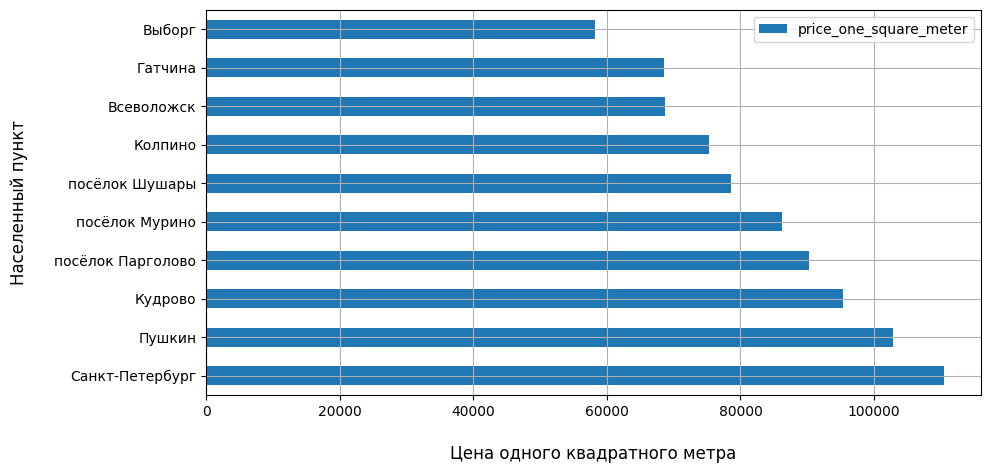

In [77]:
locality_ten_pivot.plot(kind='barh', grid=True, figsize=(10, 5));
plt.xlabel("\n" + 'Цена одного квадратного метра', fontsize=12)
plt.ylabel('Населенный пункт' + "\n", fontsize=12)
plt.show()

Из сводной таблицы и графика видно, что наибольшая средняя цена за `1` квадратный метр в Санкт-Петербурге(`114797` руб.). Следом по стоимости идет Пушкин(`103147` руб.). Наименьшая цена за квадратный метр в Выборге(`59529` руб.).

### 8. Выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города.

In [78]:
spb_locality = data.query('locality_name == "Санкт-Петербург"')
# Запишем в переменную spb_locality данные по населенному пункту(Санкт-Петербург)

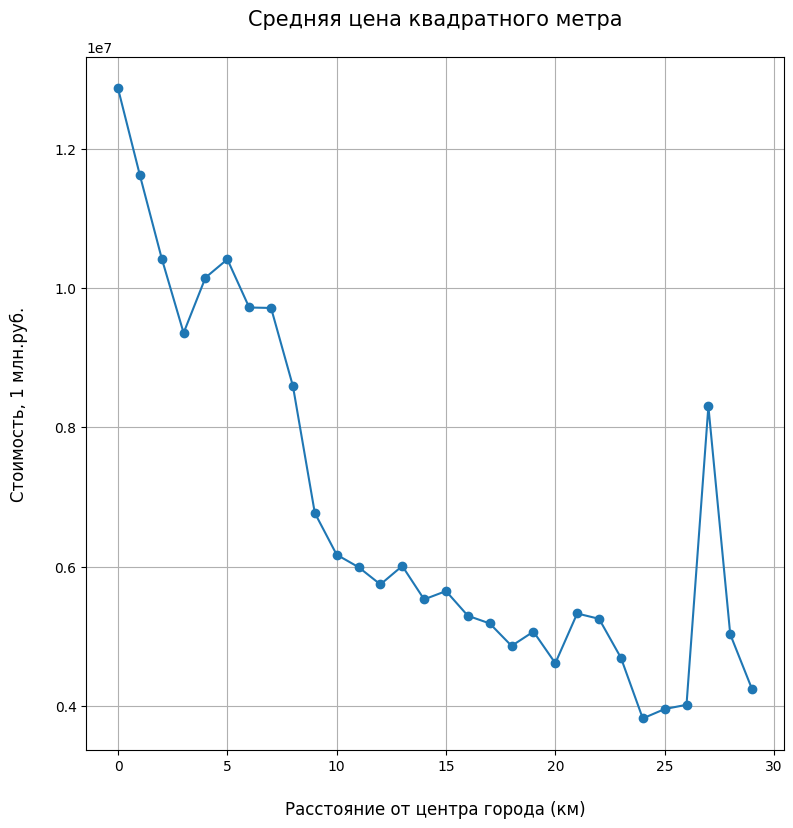

In [79]:
(
spb_locality
    .pivot_table(index='city_centers_nearest_km', values='last_price') #price_one_square_meter
    .plot(marker='o', grid=True, figsize=(9, 9), legend=False)
)
plt.title('Средняя цена квадратного метра' + "\n", fontsize=15)
plt.xlabel("\n" + 'Расстояние от центра города (км)', fontsize=12)
plt.ylabel('Стоимость, 1 млн.руб.' + "\n", fontsize=12)
plt.show()
# Рассчитаем среднюю цену квадратного метра до центра

Из графика можно заметить, что после 8-го километра форма графика становится линейной и стоимость начинается уменьшаться. Максимальная стоимость в зоне у самого центра(до 1 км). Пик в районе 27 км - возможен из-за класса жилья - элитное.

Стоит изучить записи, которые привели к выбросу на 27-м км:

In [80]:
spb_27km = data.query("locality_name == 'Санкт-Петербург' and city_centers_nearest_km == 27")

In [81]:
spb_27km

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,publication_weekday,publication_month,publication_year,category_floor,city_centers_nearest_km
748,13,14350000,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,1496.0,0.0,NaN,128.0,193918.92,1,11,2017,другой,27.0
5961,6,2250000,32.0,2018-02-27,1,NaN,2,16.5,2,False,...,NaN,0.0,NaN,178.0,70312.50,1,2,2018,последний,27.0


In [82]:
spb_27km.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,publication_weekday,publication_month,publication_year,city_centers_nearest_km
count,2.000000,2.000000e+00,2.000000,2.000000,1.00,2.00000,2.000000,2.000000,2.000000,2.0,...,2.000000,1.0,2.0,0.0,2.000000,2.00000,2.0,2.000000,2.000000,2.0
mean,9.500000,8.300000e+06,53.000000,1.500000,3.13,3.50000,23.250000,2.500000,16.000000,0.0,...,0.500000,1496.0,0.0,NaN,153.000000,132115.71000,1.0,6.500000,2017.500000,27.0
std,4.949747,8.555992e+06,29.698485,0.707107,NaN,2.12132,9.545942,0.707107,12.727922,0.0,...,0.707107,NaN,0.0,NaN,35.355339,87402.93778,0.0,6.363961,0.707107,0.0
min,6.000000,2.250000e+06,32.000000,1.000000,3.13,2.00000,16.500000,2.000000,7.000000,0.0,...,0.000000,1496.0,0.0,NaN,128.000000,70312.50000,1.0,2.000000,2017.000000,27.0
25%,7.750000,5.275000e+06,42.500000,1.250000,3.13,2.75000,19.875000,2.250000,11.500000,0.0,...,0.250000,1496.0,0.0,NaN,140.500000,101214.10500,1.0,4.250000,2017.250000,27.0
50%,9.500000,8.300000e+06,53.000000,1.500000,3.13,3.50000,23.250000,2.500000,16.000000,0.0,...,0.500000,1496.0,0.0,NaN,153.000000,132115.71000,1.0,6.500000,2017.500000,27.0
75%,11.250000,1.132500e+07,63.500000,1.750000,3.13,4.25000,26.625000,2.750000,20.500000,0.0,...,0.750000,1496.0,0.0,NaN,165.500000,163017.31500,1.0,8.750000,2017.750000,27.0
max,13.000000,1.435000e+07,74.000000,2.000000,3.13,5.00000,30.000000,3.000000,25.000000,0.0,...,1.000000,1496.0,0.0,NaN,178.000000,193918.92000,1.0,11.000000,2018.000000,27.0


У нас всего 2 записи на 27-м км., одна из которых с аномальной ценой, по этой причине мы отвергаем данное наблюдение, это всего лишь выброс.

### 9. Общий вывод:

Во время выполнения проекта мы:
- Открыли файл с данными и изучили общую информацию, загрузили данные из файла в датафрейм, изучили общую информацию о полученном датафрейме и постройте общую гистограмму для всех числовых столбцов таблицы. По предварительному просмотру основной информации данных можно отметили достаточно много проблем:
    - данные имели достаточно большое колличество пропусков в столбцах;
    - данные нуждались в замене типа данных;
    - данные имели достаточно большое колличество аномальных значений.
- Предобработали данные, а именно:
    - Нашли и изучили пропущенные значения в столбцах;
    - Определили, в каких столбцах есть пропуски;
    - Заполнили пропущенные значения там, где это возможно;
    - Указали причины, которые могли привести к пропускам в данных;
    - Рассмотрели типы данных в каждом столбце и нашли столбцы, в которых нужно изменить тип данных. Преобразовали тип данных в выбранных столбцах;
    - Изучили уникальные значения в столбце с названиями и устранили неявные дубликаты;
    - Нашли и устранили редкие и выбивающиеся значения.
- Добавили в таблицу новые столбцы со следующими параметрами:
    - цена одного квадратного метра;
    - день недели публикации объявления (`0` — понедельник, `1` — вторник и так далее);
    - месяц публикации объявления;
    - год публикации объявления;
    - тип этажа квартиры (значения — «‎первый», «последний», «другой»);
    - расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
- Провели исследовательский анализ данных:
    - Изучили следующие параметры объектов:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления.
    - Построили отдельные гистограммы для каждого из этих параметров. Описали наблюдения по параметрам.
- Ответили дополнительно на 4 вопроса по которым можно отметить, что:
    - Наибольшее влияние на стоимость квартиры оказывает её площадь. Чем больше площадь квартиры, тем выше её стоимость. Также на стоимость квартиры влияет и количество комнат. Чем больше комнат, тем выше стоимость. На стоимость квартиры также влияет расстояние до центра города. Чем ближе квартира располагается к центру, тем выше ее стоимость. По результатам исследования приняли, что зона центра города распространяется на `8` км.
    - Мы получили представление о типичном объекте недвижимости:* квартира с `1` или `2` комнатами, `5-ти` или `9-ти` этажка (с квартирой с `1` по `4` этаж), общей площадью около `45` м², площадью кухни около `5,5` м², с высотой потолков `2,6` м, стоимостью около `3.5` млн.руб, расположенной на удалении от центра на расстоянии `11-16` км, от аэропорта на расстоянии `15-25` км, до ближайшего парка около `500` метров.
    - Ожидаемое время продажи объекта недвижимости* - от `45` до `231` день.
    - Самая высокая средняя стоимость квадратного метра в Санкт-Петербурге* - `111 722` руб./м² (топ-10 населенных пунктов по количеству объявлений).
    - Самая низкая средняя стоимость квадратного метра в Выборге* - `57 011` руб./м² (топ-10 населенных пунктов по количеству объявлений). 

